# CZ3004 Image Recognition

## Install YOLOv8

YOLOv8 is still under heavy development. The version used in this notebook is 8.0.20. We shall install it using pip.
The documentation of YOLOv8 can be accessed [here](https://docs.ultralytics.com/usage/cli/).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/cz3004-imageRec/

/content/drive/MyDrive/cz3004-imageRec


In [ ]:
# remove old dataset files
# dont run this one unless old dataset is polluted
!rm -r datasets/*

In [ ]:
# library installation
!pip install ultralytics==8.0.134

from IPython import display
display.clear_output()

!pip install roboflow
!pip install PyYAML

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled 

In [ ]:
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import display, Image
from roboflow import Roboflow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import yaml
import os
import random

Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.7/166.8 GB disk)


In [ ]:
!nvidia-smi

Wed Oct  4 14:21:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    24W / 300W |      2MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Load Roboflow datasets

In [ ]:
!rm -r MDPGrp34-Robo-3/

In [ ]:
# new dataset 4th Oct 2923
rf = Roboflow(api_key="7GfIPboA98BdQKyjCnSR")
project = rf.workspace("mdpshareddataset").project("datasetv1-h8nvd")
dataset = project.version(23).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to datasetv1-23 in yolov8:: 100%|██████████| 14014/14014 [00:32<00:00, 427.96it/s] 


In [ ]:
getIDs("/content/datasetv1-23/train/labels")

add 33 from photo_17_2023-08-31_01-05-56_jpg.rf.b8b2b291e6865e58c15cbbf5f87c2222.txt
add 1 from 20230830_171825_jpg.rf.c0280692be21e1278caa84876d1ccb05.txt
add 26 from IMG_8177_jpeg.rf.f012999b4d9943d38470fb2db7e6a404.txt
add 23 from IMG_9DDDCDA10986-69_jpeg.rf.c560ad69eea6b3020b5329db796985aa.txt
add 19 from IMG_3769_jpeg.rf.a587df7be58aa246b581ce8d1fa0f1b8.txt
add 14 from 20230831_145458_jpg.rf.3a6b446782fd768b26fa858445160fe5.txt
add 15 from 20230831_150257_jpg.rf.642148f99418d48c57d5de0c52a9dc13.txt
add 13 from IMG_7644_jpg.rf.5356c48901e9fa30af82d097685b1f5d.txt
add 25 from 20230831_152120_jpg.rf.c7dd4652cee682a204b6d28ede414416.txt
add 31 from 20230829_171517_jpg.rf.a84a81f3be0a341b4f1dadafb40c8d81.txt
add 21 from IMG_6190_jpeg.rf.ac724841649b5845491a49b1b0dca030.txt
add 24 from 20230831_150027_jpg.rf.a4e5ca4781a67df03df44622c8c405bf.txt
add 6 from IMG_8377_jpeg.rf.382ce5dba84c3fce138d9277771595b5.txt
add 30 from right-indoor-30left-30_jpg.rf.45817e96ad5889be25162adc2f0b8f8c.txt


{'33': 'photo_17_2023-08-31_01-05-56_jpg.rf.b8b2b291e6865e58c15cbbf5f87c2222',
 '1': '20230830_171825_jpg.rf.c0280692be21e1278caa84876d1ccb05',
 '26': 'IMG_8177_jpeg.rf.f012999b4d9943d38470fb2db7e6a404',
 '23': 'IMG_9DDDCDA10986-69_jpeg.rf.c560ad69eea6b3020b5329db796985aa',
 '19': 'IMG_3769_jpeg.rf.a587df7be58aa246b581ce8d1fa0f1b8',
 '14': '20230831_145458_jpg.rf.3a6b446782fd768b26fa858445160fe5',
 '15': '20230831_150257_jpg.rf.642148f99418d48c57d5de0c52a9dc13',
 '13': 'IMG_7644_jpg.rf.5356c48901e9fa30af82d097685b1f5d',
 '25': '20230831_152120_jpg.rf.c7dd4652cee682a204b6d28ede414416',
 '31': '20230829_171517_jpg.rf.a84a81f3be0a341b4f1dadafb40c8d81',
 '21': 'IMG_6190_jpeg.rf.ac724841649b5845491a49b1b0dca030',
 '24': '20230831_150027_jpg.rf.a4e5ca4781a67df03df44622c8c405bf',
 '6': 'IMG_8377_jpeg.rf.382ce5dba84c3fce138d9277771595b5',
 '30': 'right-indoor-30left-30_jpg.rf.45817e96ad5889be25162adc2f0b8f8c',
 '11': 'IMG_5758_JPG.rf.7a17cea121140d00e216384c4dfba1f7',
 '3': 'msg464692206-47533

In [ ]:
rf = Roboflow(api_key="uDkrYRNOfJBGNvv3Sw2H")
project = rf.workspace("mdpgrp34").project("mdpgrp34")
dataset = project.version(3).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to MDPGrp34-3 in yolov8:: 100%|██████████| 33232/33232 [04:54<00:00, 112.76it/s]


In [ ]:
# Load the data from the YAML file
with open('MDPGrp34-1/data.yaml', 'r') as file:
    data = yaml.load(file, Loader=yaml.FullLoader)

print(data)

{'names': ['100', '101', '102', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '99'], 'nc': 34, 'roboflow': {'license': 'CC BY 4.0', 'project': 'mdpgrp34', 'url': 'https://universe.roboflow.com/mdpgrp34/mdpgrp34/dataset/3', 'version': 3, 'workspace': 'mdpgrp34'}, 'test': 'MDPGrp34-1/test/images', 'train': 'MDPGrp34-1/train/images', 'val': 'MDPGrp34-1/valid/images'}


## Load Kaggle datasets

In [ ]:
import shutil

### Dataset installation

In [ ]:
!pip install kaggle

In [ ]:
%cd /root/
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

/root


Saving kaggle.json to kaggle.json
cp: cannot create regular file '/root/.kaggle/': Not a directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
%cd /content/drive/MyDrive/cz3004-imageRec/kaggle

/content/drive/MyDrive/cz3004-imageRec/kaggle


In [ ]:
!kaggle datasets download -d nailahgpgucon/ntu-cz3004-image-recognition

... resuming from 10031726592 bytes (1610189801 bytes left) ...
100% 10.8G/10.8G [00:57<00:00, 33.0MB/s]
100% 10.8G/10.8G [00:57<00:00, 27.9MB/s]


In [ ]:
!unzip /content/drive/MyDrive/cz3004-imageRec/kaggle/ntu-cz3004-image-recognition.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/IMG_3315.txt     
  inflating: images/IMG_3316.JPG     
  inflating: images/IMG_3316.txt     
  inflating: images/IMG_3317.JPG     
  inflating: images/IMG_3317.txt     
  inflating: images/IMG_3318.JPG     
  inflating: images/IMG_3318.txt     
  inflating: images/IMG_3319.JPG     
  inflating: images/IMG_3319.txt     
  inflating: images/IMG_3320.JPG     
  inflating: images/IMG_3320.txt     
  inflating: images/IMG_3321.JPG     
  inflating: images/IMG_3321.txt     
  inflating: images/IMG_3352.JPG     
  inflating: images/IMG_3352.txt     
  inflating: images/IMG_3353.JPG     
  inflating: images/IMG_3353.txt     
  inflating: images/IMG_3354.JPG     
  inflating: images/IMG_3354.txt     
  inflating: images/IMG_3355.JPG     
  inflating: images/IMG_3355.txt     
  inflating: images/IMG_3356.JPG     
  inflating: images/IMG_3356.txt     
  inflating: images/IMG_3357.JPG     
  inflating: images/IMG_3357.txt     

### fist-time setup

In [ ]:
# get all unique label ids and the first matching image given an image path
# the matching image is to check the label mapping for old Kaggle dataset
def getIDs(images_path: str):
  unique_ids = {} # format: (id: filename)
  for filename in os.listdir(images_path):
    if filename.endswith(".txt"):
      file_path = os.path.join(images_path, filename)
      # Read the content of the text file
      with open(file_path, 'r') as file:
        first_line = file.readline()
      try:
        old_label_id = first_line.split()[0]
      except IndexError:
        continue
      if old_label_id not in unique_ids:
        unique_ids[old_label_id]=filename.replace('.txt', '') # add new id into dict
        print(f"add {old_label_id} from {filename}")
  return unique_ids

In [ ]:
# check file extensions. Kaggle datasets has 3 extensions: txt, jpg and JPG
# it returns the extension with its number of files in this extension
def checkTypes(folder_path: str):
  file_extensions = {}

  for filename in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, filename)):
      file_extension = os.path.splitext(filename)[1]
      if file_extension not in file_extensions:
        file_extensions[file_extension] = 1
      else:
        file_extensions[file_extension] += 1

  return file_extensions

In [ ]:
# get all unique label id from kaggle dataset
# dont need to run second time after mapping is done
images_path = '/content/drive/MyDrive/cz3004-imageRec/kaggle/images'
unique_ids = getIDs(images_path)

add 3 from A1-1.txt
add 4 from A2-1.txt
add 5 from A3-1.txt
add 6 from A4-1.txt
add 7 from A5-1.txt
add 8 from A6-1.txt
add 9 from A7-1.txt
add 10 from A8-1.txt
add 11 from A9-1.txt
add 28 from AU-1.txt
add 29 from IMG_0001.txt
add 30 from IMG_0041.txt
add 31 from IMG_0225.txt
add 32 from IMG_0388.txt
add 12 from IMG_0577.txt
add 13 from IMG_0916.txt
add 14 from IMG_1103.txt
add 15 from IMG_1270.txt
add 16 from IMG_1632.txt
add 17 from IMG_1804.txt
add 18 from IMG_2078.txt
add 19 from IMG_2245.txt
add 21 from IMG_2375.txt
add 20 from IMG_2563.txt
add 22 from IMG_2968.txt
add 23 from IMG_3118.txt
add 24 from IMG_3312.txt
add 25 from IMG_3497.txt
add 26 from IMG_3902.txt
add 27 from IMG_4037.txt
add 33 from IMG_4551.txt


check RoboFlow dataset labels

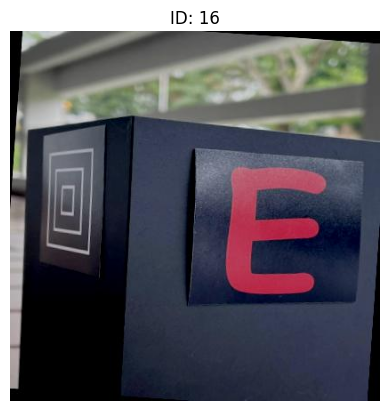

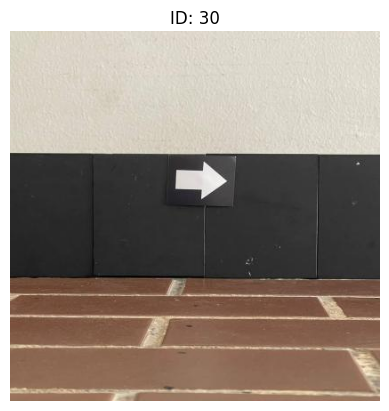

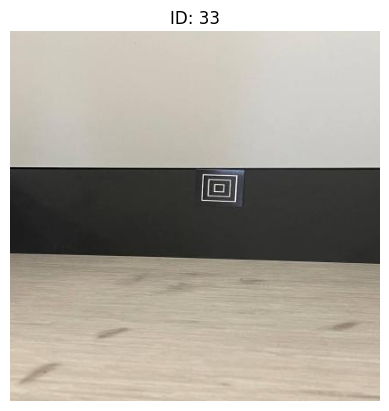

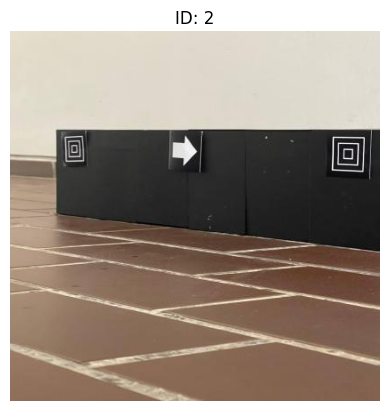

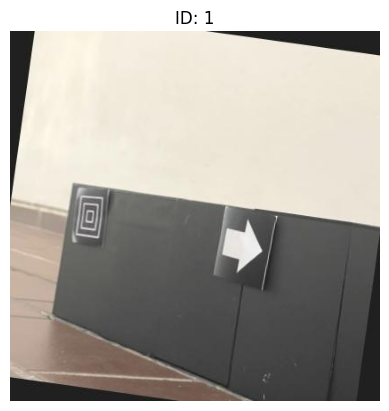

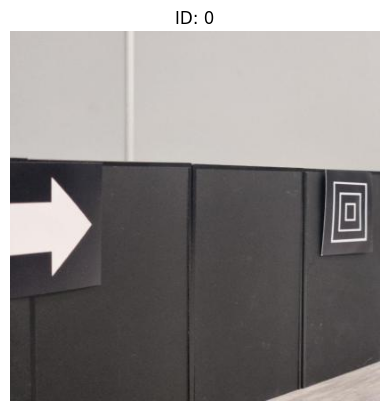

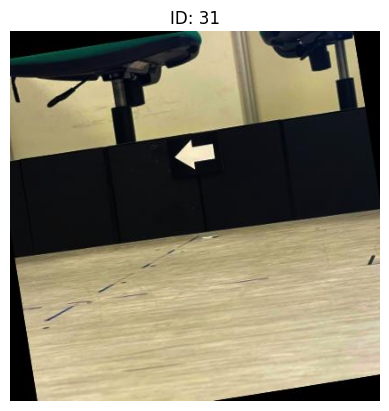

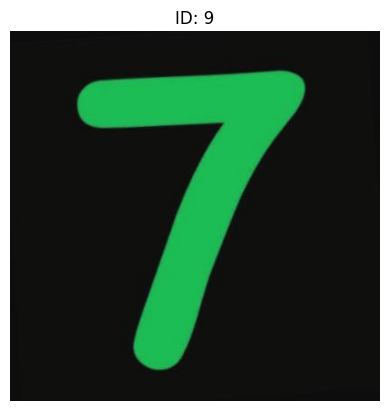

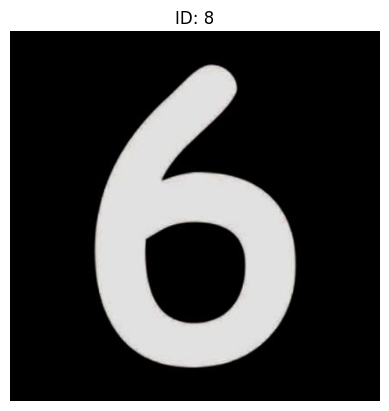

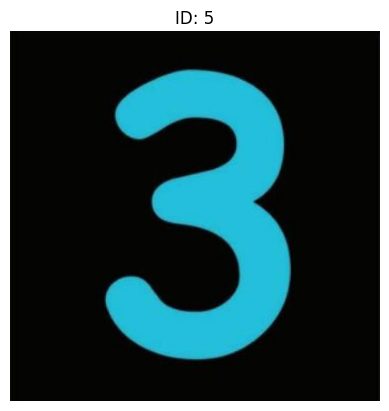

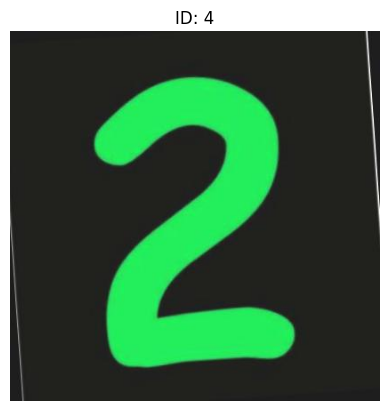

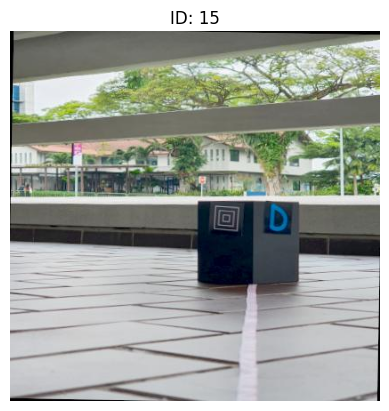

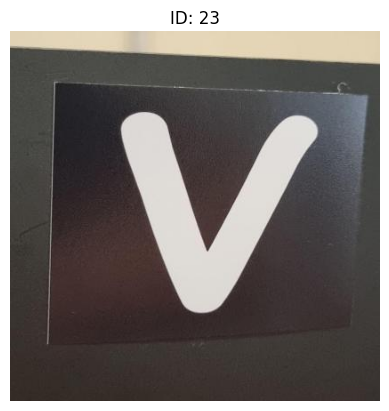

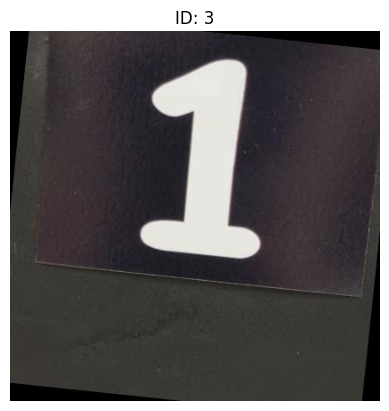

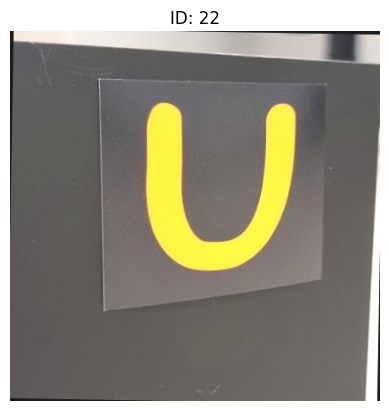

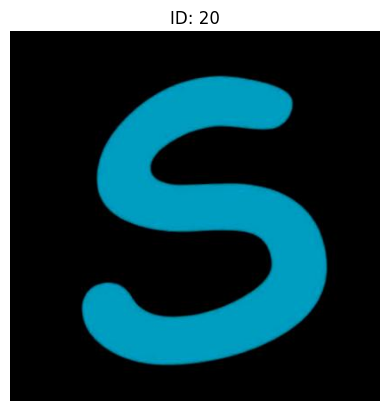

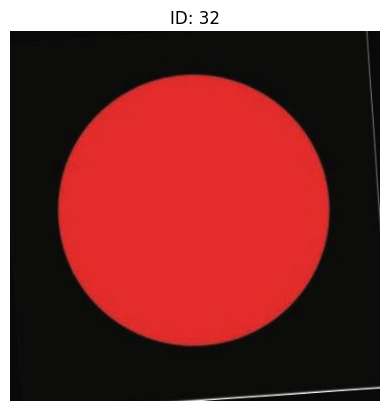

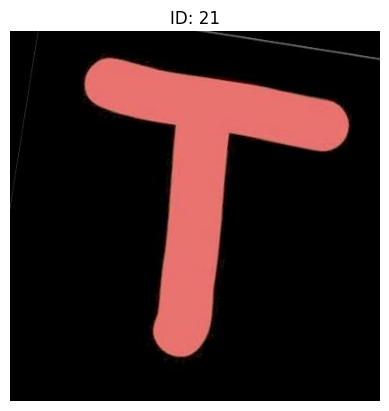

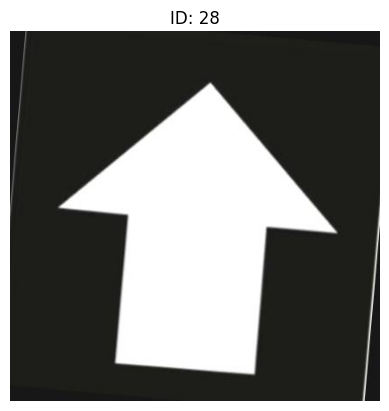

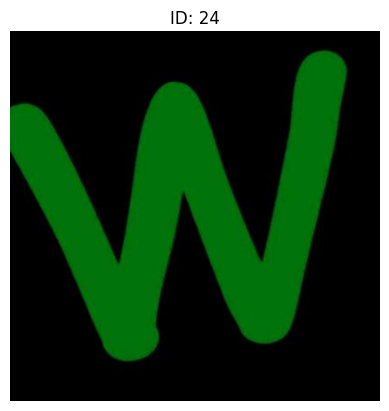

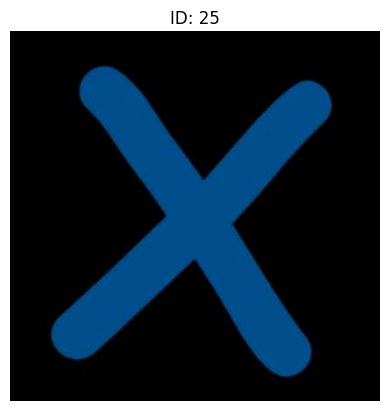

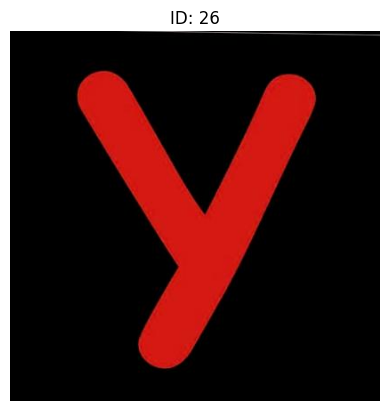

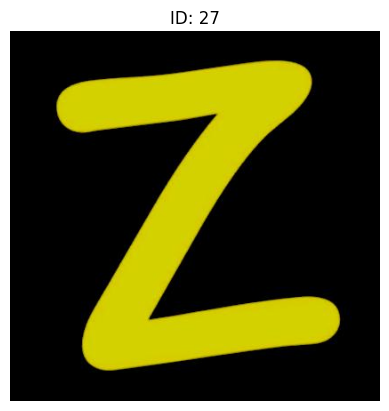

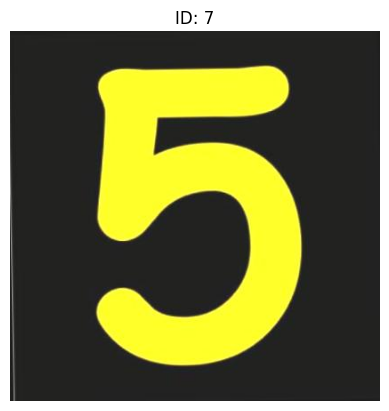

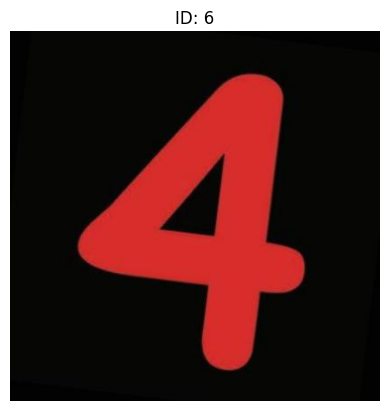

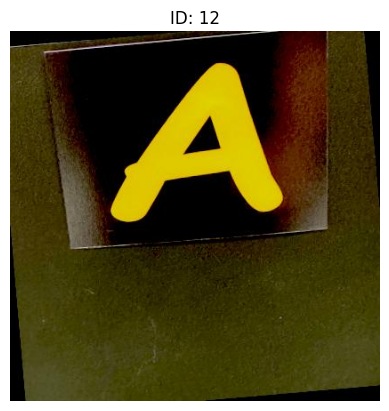

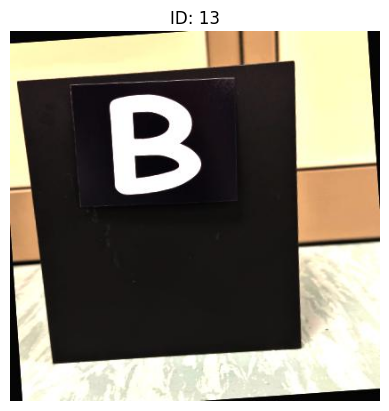

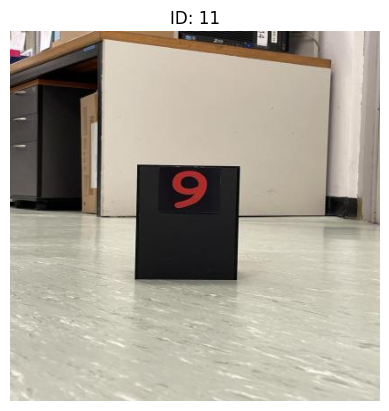

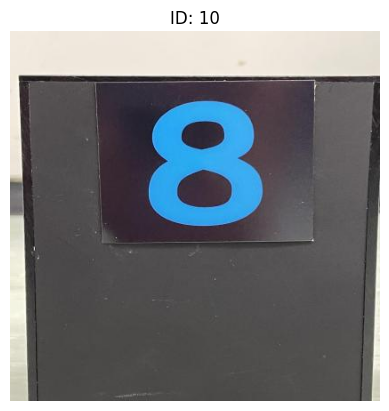

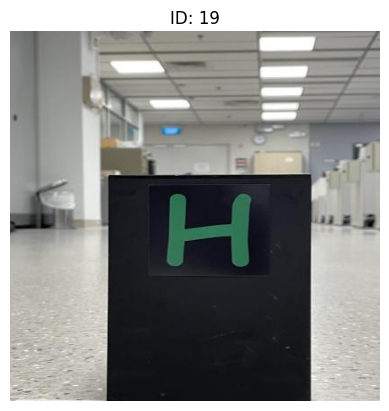

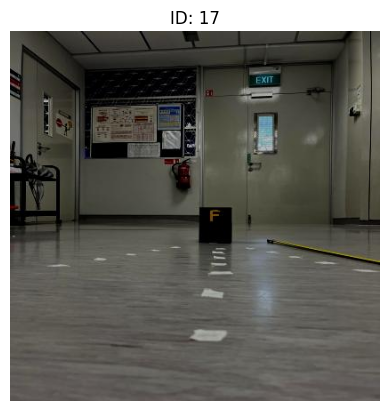

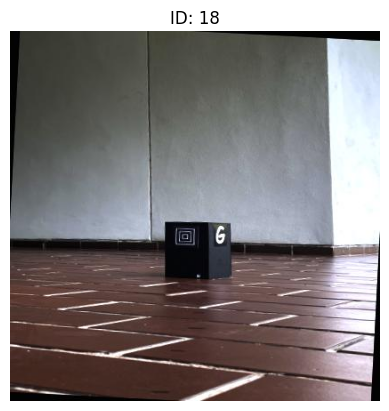

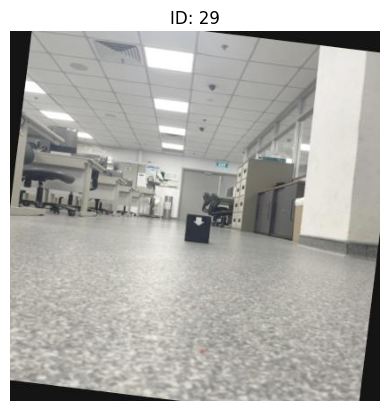

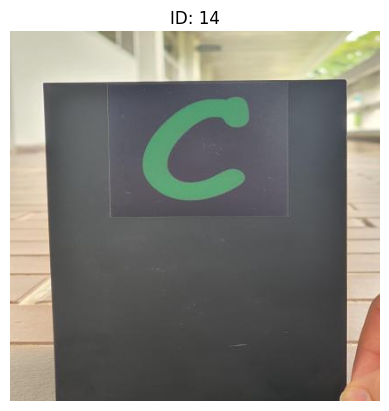

In [ ]:
images_path = '/content/drive/MyDrive/cz3004-imageRec/datasets/MDPGrp34-1/train/images'
# display all images with their old labels. This is helpful to generate the mapping info
for key, value in unique_ids.items():
  try:
    image_name_upper = value + '.jpg'
    image_path = os.path.join(images_path, image_name_upper)
    img = mpimg.imread(image_path)
  except FileNotFoundError:
    image_name_lower = value + '.JPG'
    image_path = os.path.join(images_path, image_name_lower)
    img = mpimg.imread(image_path)

  plt.imshow(img)
  plt.title(f'ID: {key}')
  plt.axis('off')

  plt.show()

In [ ]:
images_path = '/content/drive/MyDrive/cz3004-imageRec/datasets/MDPGrp34-1/train/images'
unique_ids = getIDs(images_path)

In [ ]:
file_extensions = checkTypes(images_path)
file_extensions

{'.JPG': 4449, '.txt': 4774, '.jpg': 324}

check Kaggle labels

In [ ]:
# display all images with their old labels. This is helpful to generate the mapping info
for key, value in unique_ids.items():
  try:
    image_name_upper = value + '.JPG'
    image_path = os.path.join(images_path, image_name_upper)
    img = mpimg.imread(image_path)
  except FileNotFoundError:
    image_name_lower = value + '.jpg'
    image_path = os.path.join(images_path, image_name_lower)
    img = mpimg.imread(image_path)

  plt.imshow(img)
  plt.title(f'ID: {key}')
  plt.axis('off')

  plt.show()

based on the following the info, find the mapping from Kaggle to Roboflow index

In [ ]:
label_mapping = {
    '4': '3',  # 1
    '5': '4',  # 2
    '2': '5',  # 3
    '6': '6',  # 4
    '7': '7',  # 5
    '8': '8',  # 6
    '9': '9',  # 7
    '10': '10', # 8
    '11': '11', # 9
    '0': '12',  # A
    '12': '13', # B
    '13': '14', # C
    '14': '15', # D
    '15': '16', # E
    '16': '17', # F
    '17': '18', # G
    '18': '19', # H
    '19': '20', # S
    '20': '21', # T
    '21': '22', # U
    '22': '23', # V
    '23': '24', # W
    '24': '25', # X
    '25': '26', # Y
    '1': '27', # Z
    '26': '28', # up
    '27': '29', # down
    '28': '30', # right
    '29': '31', # left
    '30': '32', # stop
    '3': '33' # bullseye
}

In [ ]:
# modify the mapping to new one
# please note that some images might have 2 annotations
def changeID(folder_path: str):
  for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
      file_path = os.path.join(folder_path, filename)
      with open(file_path, 'r') as file:
        lines = file.readlines()
        for i, line in enumerate(lines):
          line_parts = line.split()
          old_label = line_parts[0] # get the first element
          try:
            new_label = label_mapping[old_label]
            line_parts[0] = new_label
            print(f"change {old_label} to {new_label} for file {filename} line {i}")
            lines[i] = ' '.join(line_parts)+'\n'
          except KeyError:
            print(f"current label {old_label} in file {filename} line {i}, skip this file")

      with open(file_path, 'w') as file:
        file.writelines(lines)

In [ ]:
# do a backup
original_path = '/content/drive/MyDrive/cz3004-imageRec/kaggle/images'
backup_path = '/content/drive/MyDrive/cz3004-imageRec/kaggle/images_backup'
shutil.copytree(original_path, backup_path)

'/content/drive/MyDrive/cz3004-imageRec/kaggle/images_backup'

In [ ]:
label_dict = changeID(images_path)

change 4 to 3 for A1-1.txt
change 4 to 3 for A1-10.txt
change 4 to 3 for A1-11.txt
change 4 to 3 for A1-12.txt
change 4 to 3 for A1-13.txt
change 4 to 3 for A1-14.txt
change 4 to 3 for A1-15.txt
change 4 to 3 for A1-16.txt
change 4 to 3 for A1-17.txt
change 4 to 3 for A1-18.txt
change 4 to 3 for A1-19.txt
change 4 to 3 for A1-2.txt
change 4 to 3 for A1-20.txt
change 4 to 3 for A1-21.txt
change 4 to 3 for A1-22.txt
change 4 to 3 for A1-23.txt
change 4 to 3 for A1-24.txt
change 4 to 3 for A1-25.txt
change 4 to 3 for A1-26.txt
change 4 to 3 for A1-27.txt
change 4 to 3 for A1-28.txt
change 4 to 3 for A1-29.txt
change 4 to 3 for A1-3.txt
change 4 to 3 for A1-30.txt
change 4 to 3 for A1-31.txt
change 4 to 3 for A1-32.txt
change 4 to 3 for A1-33.txt
change 4 to 3 for A1-34.txt
change 4 to 3 for A1-35.txt
change 4 to 3 for A1-36.txt
change 4 to 3 for A1-37.txt
change 4 to 3 for A1-38.txt
change 4 to 3 for A1-39.txt
change 4 to 3 for A1-4.txt
change 4 to 3 for A1-40.txt
change 4 to 3 for A1-41.

In [ ]:
# check mapping again
unique_ids = getIDs(images_path)

add 3 from A1-1.txt
add 4 from A2-1.txt
add 5 from A3-1.txt
add 6 from A4-1.txt
add 7 from A5-1.txt
add 8 from A6-1.txt
add 9 from A7-1.txt
add 10 from A8-1.txt
add 11 from A9-1.txt
add 28 from AU-1.txt
add 29 from IMG_0001.txt
add 30 from IMG_0041.txt
add 31 from IMG_0225.txt
add 32 from IMG_0388.txt
add 12 from IMG_0577.txt
add 13 from IMG_0916.txt
add 14 from IMG_1103.txt
add 15 from IMG_1270.txt
add 16 from IMG_1632.txt
add 17 from IMG_1804.txt
add 18 from IMG_2078.txt
add 19 from IMG_2245.txt
add 21 from IMG_2375.txt
add 20 from IMG_2563.txt
add 22 from IMG_2968.txt
add 23 from IMG_3118.txt
add 24 from IMG_3312.txt
add 25 from IMG_3497.txt
add 26 from IMG_3902.txt
add 27 from IMG_4037.txt
add 33 from IMG_4551.txt


### Data augmenation: change color of Kaggle dataset

In [ ]:
# return label_dict in format: label: filenames(without extension)
# this is to generate roughly equal numbers of train/valid for each label
def getLabelDict(file_path: str):
  label_dict = {}
  for filename in os.listdir(images_path):
    if filename.endswith(".txt"):
      file_path = os.path.join(images_path, filename)
      # Read the content of the text file
      with open(file_path, 'r') as file:
        first_line = file.readline()
      label_id = first_line.split()[0]
      if label_id not in label_dict:
        label_dict[label_id] = [filename.replace('.txt', '')]
      else:
        label_dict[label_id] += [filename.replace('.txt', '')]
  return label_dict

In [ ]:
images_path = '/content/drive/MyDrive/cz3004-imageRec/kaggle/images'
label_dict = getLabelDict(images_path)

In [ ]:
def checkTxtFile(txt_path: str):
  with open(txt_path, 'r') as txt_file:
    txt_content = txt_file.read()
  print(txt_content)

In [ ]:
# pick one txt file to check its content
checkTxtFile('/content/drive/MyDrive/cz3004-imageRec/kaggle/images/A2-1.txt')

4 0.492460 0.369213 0.038194 0.077040



In [ ]:
def checkInstanceNum(labels: dict):
  sum = 0
  for label, files in labels.items():
    print(f"id: {label}, # of images: {len(files)}")
    sum += len(files)
  print(f"in total: {sum} images")
checkInstanceNum(label_dict)

id: 32, # of images: 154
id: 12, # of images: 151
id: 13, # of images: 150
id: 14, # of images: 150
id: 15, # of images: 148
id: 16, # of images: 150
id: 17, # of images: 149
id: 18, # of images: 153
id: 19, # of images: 148
id: 21, # of images: 154
id: 33, # of images: 224
id: 24, # of images: 152
id: 26, # of images: 149
id: 10, # of images: 151
id: 7, # of images: 154
id: 11, # of images: 151
id: 22, # of images: 151
id: 25, # of images: 152
id: 23, # of images: 150
id: 9, # of images: 152
id: 8, # of images: 154
id: 6, # of images: 154
id: 27, # of images: 147
id: 31, # of images: 154
id: 3, # of images: 154
id: 4, # of images: 154
id: 29, # of images: 154
id: 28, # of images: 153
id: 5, # of images: 153
id: 30, # of images: 154
id: 20, # of images: 150
in total: 4774 images


Split the data into train and validation. Before doing that we change the color to monochrome

In [ ]:
import cv2
from shutil import copyfile

In [ ]:
def convertMono(image_path: str):
  img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  if img is None:
    raise Exception(f"Failed to read image at {image_path}")

  # resize the img to 416*416
  resized_img = cv2.resize(img, (416, 416))
  return resized_img

In [ ]:
# check the number of files given a certain path
def checkFolderFiles(folder_path: str):
  files = os.listdir(folder_path)
  num_files = len([f for f in files if os.path.isfile(os.path.join(folder_path, f))])
  return num_files

In [ ]:
# split the dataset into train and valid, save to corresponding folders
def addDatasets(source_folder: str, train_folder: str, valid_folder: str):
  validation_percent = 20 # split 20% data to valid

  for label, txtfilenames in label_dict.items():
    print(f"working on {label}...")
    filenames = txtfilenames.copy()
    file_paths = []
    for filename in filenames:
      file_paths.append(os.path.join(source_folder, filename))  # didnt add any extension here
    # shuffle the data ramdonly:
    combined_data = list(zip(file_paths, filenames))
    random.shuffle(combined_data)

    # Split the data into training and validation sets
    num_samples = len(file_paths)
    num_valid_samples = int(num_samples * (validation_percent / 100.0))
    train_file_paths, valid_file_paths = file_paths[num_valid_samples:], file_paths[:num_valid_samples]
    train_filenames, valid_filenames = filenames[num_valid_samples:], filenames[:num_valid_samples]

    # train dataset
    not_exist_flag = False
    print(f"start copying train datasets to {train_folder}")
    for src_file, filename in zip(train_file_paths, train_filenames):
      try:  # convert image to monochrome
        img_path_lower = src_file+'.jpg'
        img = convertMono(img_path_lower)
      except Exception:
        try:
          img_path_upper = src_file+'.JPG'
          img = convertMono(img_path_upper)
        except Exception:
          print(f"failed to find {img_path_lower} or {img_path_upper}, remove this data")
          not_exist_flag = True
      if not not_exist_flag:  # if finds matching txt and jpg files
        # image file save to train/images
        dest_image_file = os.path.join(train_folder+'/images', filename+'.jpg')
        cv2.imwrite(dest_image_file, img)
        # copy txt file to train/labels
        dest_txt_file = os.path.join(train_folder+'/labels', filename+'.txt')
        shutil.copy(src_file+'.txt', dest_txt_file)

    # valid dataset
    not_exist_flag = False
    print(f"start copying valid datasets to {valid_folder}")
    for src_file, filename in zip(valid_file_paths, valid_filenames):
      try:
        img_path_lower = src_file+'.jpg'
        img = convertMono(img_path_lower)
      except Exception:
        try:
          img_path_upper = src_file+'.JPG'
          img = convertMono(img_path_upper)
        except Exception:
          print(f"failed to find {img_path_lower} or {img_path_upper}, remove this data")
          not_exist_flag = True
      if not not_exist_flag:  # if finds matching txt and jpg files
        # image file save to valid/images
        dest_image_file = os.path.join(valid_folder+'/images', filename+'.jpg')
        cv2.imwrite(dest_image_file, img)
        # copy txt file to valid/labels
        dest_txt_file = os.path.join(valid_folder+'/labels', filename+'.txt')
        shutil.copy(src_file+'.txt', dest_txt_file)

    print(f"finished copying, current:")
    print(f"train/images: {checkFolderFiles(train_folder+'/images')}, train/labels: {checkFolderFiles(train_folder+'/labels')}")
    print(f"valid/images: {checkFolderFiles(valid_folder+'/images')}, valid/labels: {checkFolderFiles(valid_folder+'/labels')}")

In [ ]:
# in case of error occurs in above code, clean all dataset first
# otherwise, please dont run the following code
!rm -r /content/drive/MyDrive/cz3004-imageRec/kaggle/datasets/MDPGrp34-1/train/images/*
!rm -r /content/drive/MyDrive/cz3004-imageRec/kaggle/datasets/MDPGrp34-1/train/labels/*
!rm -r /content/drive/MyDrive/cz3004-imageRec/kaggle/datasets/MDPGrp34-1/valid/images/*
!rm -r /content/drive/MyDrive/cz3004-imageRec/kaggle/datasets/MDPGrp34-1/valid/labels/*

In [ ]:
source_folder = "/content/drive/MyDrive/cz3004-imageRec/kaggle/images"
train_folder = "/content/drive/MyDrive/cz3004-imageRec/kaggle/datasets/MDPGrp34-1/train"
valid_folder = "/content/drive/MyDrive/cz3004-imageRec/kaggle/datasets/MDPGrp34-1/valid"

addDatasets(source_folder, train_folder, valid_folder)

working on 32...
start copying train datasets to /content/drive/MyDrive/cz3004-imageRec/kaggle/datasets/MDPGrp34-1/train
start copying valid datasets to /content/drive/MyDrive/cz3004-imageRec/kaggle/datasets/MDPGrp34-1/valid
finished copying, current:
train/images: 124, train/labels: 124
valid/images: 30, valid/labels: 30
working on 12...
start copying train datasets to /content/drive/MyDrive/cz3004-imageRec/kaggle/datasets/MDPGrp34-1/train
start copying valid datasets to /content/drive/MyDrive/cz3004-imageRec/kaggle/datasets/MDPGrp34-1/valid
finished copying, current:
train/images: 245, train/labels: 245
valid/images: 60, valid/labels: 60
working on 13...
start copying train datasets to /content/drive/MyDrive/cz3004-imageRec/kaggle/datasets/MDPGrp34-1/train
start copying valid datasets to /content/drive/MyDrive/cz3004-imageRec/kaggle/datasets/MDPGrp34-1/valid
finished copying, current:
train/images: 365, train/labels: 365
valid/images: 90, valid/labels: 90
working on 14...
start copyi

In [ ]:
# check if extensions correct
checkTypes('/content/drive/MyDrive/cz3004-imageRec/kaggle/datasets/MDPGrp34-1/valid/labels')

{'.txt': 939}

In [ ]:
!rm -r /content/drive/MyDrive/cz3004-imageRec/kaggle/datasets_backup

In [ ]:
# do a backup, datasets_backup only contains
original_path = '/content/drive/MyDrive/cz3004-imageRec/kaggle/datasets'
backup_path = '/content/drive/MyDrive/cz3004-imageRec/kaggle/datasets_backup'
shutil.copytree(original_path, backup_path)

'/content/drive/MyDrive/cz3004-imageRec/kaggle/datasets_backup'

### Combine Kaggle and Roboflow datasets

now copy the rest images from our dataset to the new dataset

In [ ]:
# copy the backup to datasets
original_path = '/content/drive/MyDrive/cz3004-imageRec/kaggle/datasets'
backup_path = '/content/drive/MyDrive/cz3004-imageRec/kaggle/datasets_backup'
# remove the polluted one
!rm -r /content/drive/MyDrive/cz3004-imageRec/kaggle/datasets
shutil.copytree(backup_path, original_path)

'/content/drive/MyDrive/cz3004-imageRec/kaggle/datasets'

before copying the rest images, we need to convert them to monochrome. We shall continue to use the function `convertMono` to achieve this

In [ ]:
def copyRoboFlow(kaggle_path: str, original_path: str):
  subfolders = ['train', 'valid', 'test']

  for subfolder in subfolders:
    # path/train, path/valid, path/test
    original_dataset_folder = os.path.join(original_path, subfolder)
    kaggle_dataset_folder = os.path.join(kaggle_path, subfolder)

    # deal with image first: path: train/images, valid/images, and test/images
    orginal_image_path = os.path.join(original_dataset_folder, 'images')
    kaggle_image_path = os.path.join(kaggle_dataset_folder, 'images')
    for filename in os.listdir(orginal_image_path):
      src_file = os.path.join(orginal_image_path, filename)
      dst_file = os.path.join(kaggle_image_path, filename)

      img = convertMono(src_file) # convert to mono
      cv2.imwrite(dst_file, img)
    print(f"{subfolder} images copied")

    # deal with label: train/labels, valid/labels, test/labels
    orginal_label_path = os.path.join(original_dataset_folder, 'labels')
    kaggle_label_path = os.path.join(kaggle_dataset_folder, 'labels')
    for filename in os.listdir(orginal_label_path):
      src_file = os.path.join(orginal_label_path, filename)
      dst_file = os.path.join(kaggle_label_path, filename)

      shutil.copy(src_file, dst_file)
    print(f"{subfolder} labels copied")
    print(f"{subfolder} done")
    print(f"images: {checkTypes(kaggle_image_path)}, labels: {checkTypes(kaggle_label_path)}")

In [ ]:
copyRoboFlow('/content/drive/MyDrive/cz3004-imageRec/kaggle/datasets/MDPGrp34-1', '/content/drive/MyDrive/cz3004-imageRec/datasets/MDPGrp34-1')

train images copied
train labels copied
train done
images: {'.jpg': 18306}, labels: {'.txt': 18306}
valid images copied
valid labels copied
valid done
images: {'.jpg': 2299}, labels: {'.txt': 2299}
test images copied
test labels copied
test done
images: {'.jpg': 710}, labels: {'.txt': 710}


randomly pick some images to check if they are indeed mono color

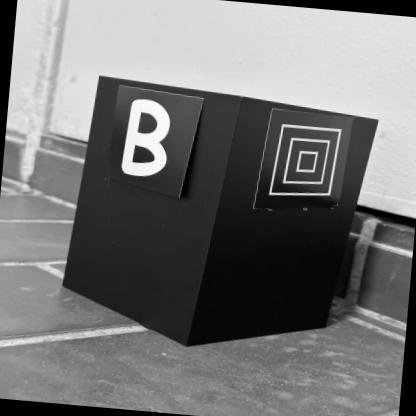

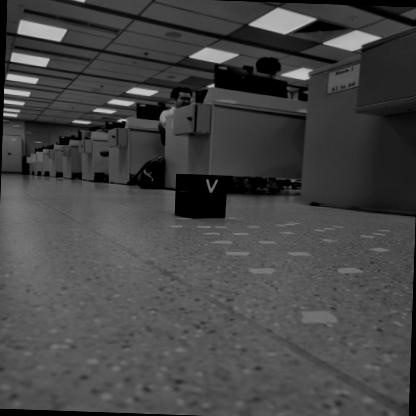

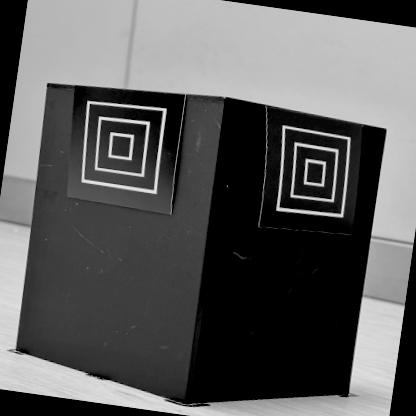

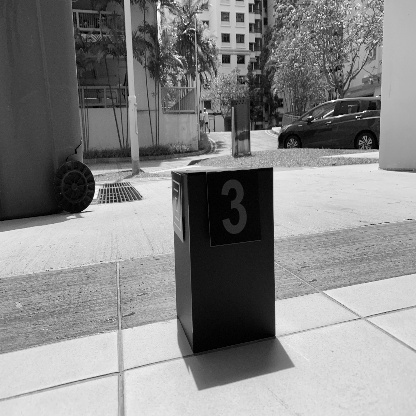

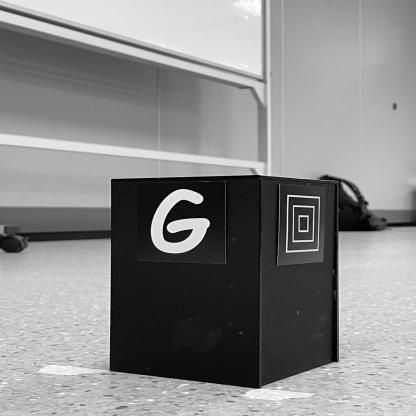

In [ ]:
combined_image_path = "/content/drive/MyDrive/cz3004-imageRec/kaggle/datasets/MDPGrp34-1/train/images"
image_files = os.listdir(combined_image_path)
random.shuffle(image_files) # randomly pick images
selected_images = image_files[:5]
for image in selected_images:
  image_path = os.path.join(combined_image_path, image)
  display(Image(filename=image_path, width=800))
  print("\n")

## Train using 2 datasets

We have uploaded the Kaggle dataset to roboflow, we shall first train using Kaggle one, as it is splitted only train and valid.

### Kaggle dataset training
* **preprocessing**: resize images to 416*416 and grayscale  
* **augmentation**: -/+5 degrees rotation, -/+25% brightness adjustment, -/+25% exposure adjustment, 0~2 pixels blur  
* **model settings**: 35 epochs, no possibility of flipping

In [ ]:
# load Kaggle dataset from roboflow
rf = Roboflow(api_key="oA8HhxrKXKeJFucSJtHu")
project = rf.workspace("mdpgrp34kaggle").project("mdpgrp34-kaggle")
dataset = project.version(2).download("yolov8")

In [ ]:
# get the number of train, validation and test data
train_images_num, train_labels_num = len(os.listdir("MDPGrp34-Kaggle-2/train/images")), len(os.listdir("MDPGrp34-Kaggle-2/train/labels"))
valid_images_num, valid_labels_num = len(os.listdir("MDPGrp34-Kaggle-2/valid/images")), len(os.listdir("MDPGrp34-Kaggle-2/valid/labels"))
print(f"train: #images: {train_images_num}, #labels: {train_labels_num}")
print(f"validation: #images: {valid_images_num}, #labels: {valid_labels_num}")

train: #images: 10185, #labels: 10185
validation: #images: 1457, #labels: 1457


In [ ]:
# change root setting
setting_path = "/root/.config/Ultralytics/settings.yaml"
with open(setting_path, 'r') as setting_file:
    setting_content = setting_file.read()

new_content = setting_content.replace("datasets_dir: /content/datasets", "datasets_dir: /content/drive/MyDrive/cz3004-imageRec/MDPGrp34-Kaggle-2")

with open(setting_path, 'w') as file:
    file.write(new_content)
print(new_content)

datasets_dir: /content/drive/MyDrive/cz3004-imageRec/MDPGrp34-Kaggle-2
weights_dir: weights
runs_dir: runs
uuid: 569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb
sync: true
api_key: ''
settings_version: 0.0.3



In [ ]:
%cd /content/drive/MyDrive/cz3004-imageRec/MDPGrp34-Kaggle-2

/content/drive/MyDrive/cz3004-imageRec/MDPGrp34-Kaggle-2


In [ ]:
!rm -r /content/drive/MyDrive/cz3004-imageRec/MDPGrp34-Kaggle-2/runs

rm: cannot remove '/content/drive/MyDrive/cz3004-imageRec/MDPGrp34-Kaggle-2/runs': No such file or directory


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data='data.yaml' epochs=40 imgsz=416 fliplr=0.0 flipud=0.0 plots=True

100% 49.7M/49.7M [00:00<00:00, 184MB/s]
New https://pypi.org/project/ultralytics/8.0.191 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=40, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic

In [ ]:
# display validation prediction
valid_path = [f"runs/detect/train/val_batch{i}_pred.jpg" for i in range(0,3)]
# Create a subplot for each image
fig, axs = plt.subplots(3, 1, figsize=(300,100))

for i, path in enumerate(valid_path):
    img = mpimg.imread(path)
    axs[i].imshow(img)
    axs[i].axis('off')

plt.show()

In [ ]:
!rm -r /content/drive/MyDrive/cz3004-imageRec/MDPGrp34-Kaggle-2/runs/detect/val

In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3011693 parameters, 0 gradients
100% 755k/755k [00:00<00:00, 27.0MB/s]
val: Scanning /content/drive/MyDrive/cz3004-imageRec/MDPGrp34-Kaggle-2/valid/labels.cache... 1457 images, 0 backgrounds, 0 corrupt: 100% 1457/1457 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 92/92 [00:44<00:00,  2.07it/s]
                   all       1457       1526      0.994      0.995      0.995      0.953
                    11       1457         58          1       0.96      0.995      0.925
                    12       1457         62      0.997          1      0.995      0.947
                    13       1457         49      0.987          1      0.995      0.943
                    14       1457         41      0.994          1      0.995      0.929
                    15       1457         46      0.995          1     

### Test Kaggle model

In [ ]:
!rm -r runs/detect/predict

In [ ]:
# change images to 416*416 and grayscale
image_folder = "/content/drive/MyDrive/cz3004-imageRec/general_test/images"

for filename in os.listdir(image_folder):
  image_path = os.path.join(image_folder, filename)
  img = cv2.imread(image_path)
  if img is None:
    print(f"invalid image path: {image_path}")
    continue
  img = cv2.resize(img, (416, 416))
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  cv2.imwrite(image_path, gray_img)

print('Conversion complete.')

invalid image path: /content/drive/MyDrive/cz3004-imageRec/general_test/images/.ipynb_checkpoints
Conversion complete.


In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=/content/drive/MyDrive/cz3004-imageRec/general_test/images save=True

Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25857709 parameters, 0 gradients

image 1/14 /content/drive/MyDrive/cz3004-imageRec/general_test/images/5.jpg: 416x416 (no detections), 21.9ms
image 2/14 /content/drive/MyDrive/cz3004-imageRec/general_test/images/5_bullseye.jpg: 416x416 1 15, 1 99, 22.0ms
image 3/14 /content/drive/MyDrive/cz3004-imageRec/general_test/images/8_bullseye.jpg: 416x416 1 21, 21.9ms
image 4/14 /content/drive/MyDrive/cz3004-imageRec/general_test/images/8_bullseye2.jpg: 416x416 (no detections), 21.9ms
image 5/14 /content/drive/MyDrive/cz3004-imageRec/general_test/images/B.jpg: 416x416 1 21, 21.9ms
image 6/14 /content/drive/MyDrive/cz3004-imageRec/general_test/images/B_bullseye.jpg: 416x416 1 21, 21.9ms
image 7/14 /content/drive/MyDrive/cz3004-imageRec/general_test/images/B_bullseye2.jpg: 416x416 1 21, 1 99, 21.9ms
image 8/14 /content/drive/MyDrive/cz3004-imageRec/general_test/images/bullse

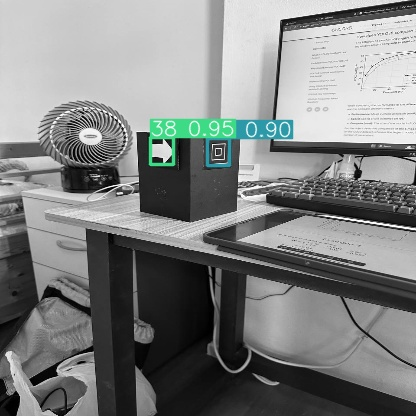

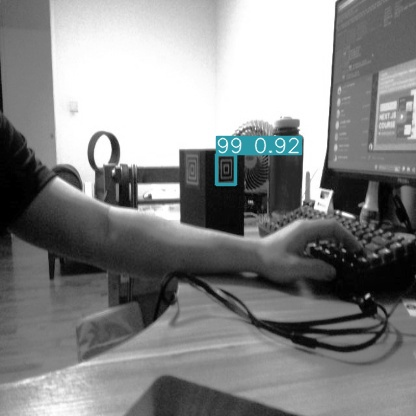

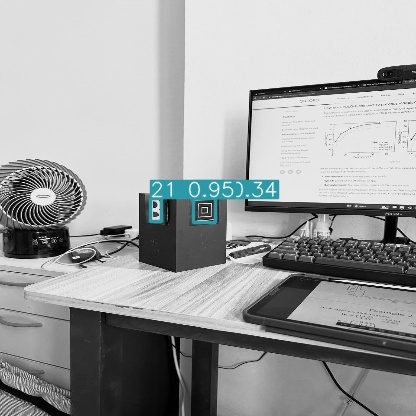

In [ ]:
predict_path = "runs/detect/predict/"
image_files = os.listdir(predict_path)
random.shuffle(image_files) # randomly pick images
selected_images = image_files[:3]
for image in selected_images:
  image_path = os.path.join(predict_path, image)
  display(Image(filename=image_path, width=800))
  print("\n")

### Roboflow dataset training
we continue training given the best weight from Kaggle dataset one
* **preprocessing**: resize images to 416*416 and grayscale
* **augmentation**: -/+10 degrees rotation, -/+25% brightness adjustment, -/+25% exposure adjustment, 0~2.5 pixels blur
* **model settings**: 35 epochs, no possibility of flipping

In [ ]:
%cd /content/drive/MyDrive/cz3004-imageRec/MDPGrp34-Robo-3

/content/drive/MyDrive/cz3004-imageRec/MDPGrp34-Robo-3


In [ ]:
# change images to 416*416 and grayscale
def preprocess(image_folder: str):
  for filename in os.listdir(image_folder):
    image_path = os.path.join(image_folder, filename)
    img = cv2.imread(image_path)
    if img is None:
      print(f"invalid image path: {image_path}")
      continue
    img = cv2.resize(img, (416, 416))
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    cv2.imwrite(image_path, gray_img)

  print('Conversion complete.')

In [ ]:
train_path = "/content/drive/MyDrive/cz3004-imageRec/MDPGrp34-Robo-3/train/images"
valid_path = "/content/drive/MyDrive/cz3004-imageRec/MDPGrp34-Robo-3/valid/images"
test_path = "/content/drive/MyDrive/cz3004-imageRec/MDPGrp34-Robo-3/test/images"
preprocess(train_path)
preprocess(valid_path)
preprocess(test_path)

Conversion complete.
Conversion complete.
Conversion complete.


In [ ]:
# get the number of train, validation and test data
train_images_num, train_labels_num = len(os.listdir("train/images")), len(os.listdir("train/labels"))
valid_images_num, valid_labels_num = len(os.listdir("valid/images")), len(os.listdir("valid/labels"))
test_images_num, test_labels_num = len(os.listdir("test/images")), len(os.listdir("test/labels"))
print(f"train: #images: {train_images_num}, #labels: {train_labels_num}")
print(f"validation: #images: {valid_images_num}, #labels: {valid_labels_num}")
print(f"test: #images: {test_images_num}, #labels: {test_labels_num}")

train: #images: 14540, #labels: 14540
validation: #images: 1360, #labels: 1360
test: #images: 710, #labels: 710


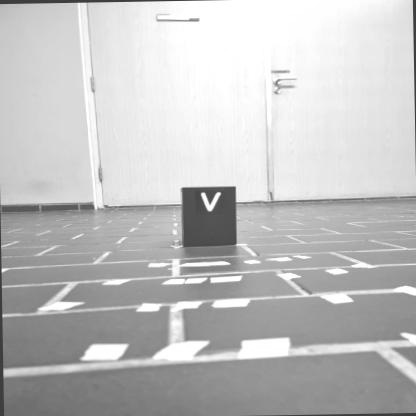

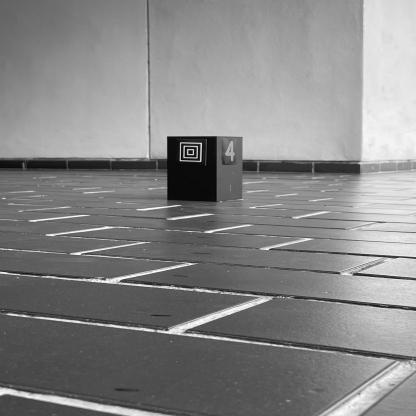

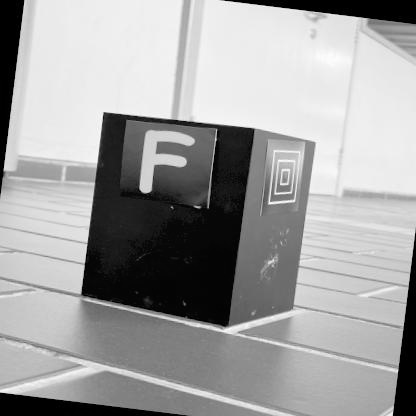

In [ ]:
image_files = os.listdir("train/images")
random.shuffle(image_files) # randomly pick images
selected_images = image_files[:3]
for image in selected_images:
  image_path = os.path.join("train/images", image)
  display(Image(filename=image_path))
  print("\n")

In [ ]:
# change root setting
setting_path = "/root/.config/Ultralytics/settings.yaml"
with open(setting_path, 'r') as setting_file:
    setting_content = setting_file.read()

new_content = setting_content.replace("datasets_dir: /content/drive/MyDrive/cz3004-imageRec/datasets", "datasets_dir: /content/drive/MyDrive/cz3004-imageRec/MDPGrp34-Robo-3")

with open(setting_path, 'w') as file:
    file.write(new_content)
print(new_content)

datasets_dir: /content/drive/MyDrive/cz3004-imageRec/MDPGrp34-Robo-3
weights_dir: weights
runs_dir: runs
uuid: 569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb
sync: true
api_key: ''
settings_version: 0.0.3



In [ ]:
!rm -r runs/detect/train2

In [ ]:
!yolo task=detect mode=train model=/content/drive/MyDrive/cz3004-imageRec/MDPGrp34-Kaggle-2/runs/detect/train/weights/best.pt data='data.yaml' epochs=40 imgsz=416 fliplr=0.0 flipud=0.0 plots=True

New https://pypi.org/project/ultralytics/8.0.192 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/cz3004-imageRec/MDPGrp34-Kaggle-2/runs/detect/train/weights/best.pt, data=data.yaml, epochs=40, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_

In [ ]:
!rm -r runs/detect/val

In [ ]:
# validate the model
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 218 layers, 25859446 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/cz3004-imageRec/MDPGrp34-Robo-3/valid/labels.cache... 1360 images, 0 backgrounds, 0 corrupt: 100% 1360/1360 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3, len(boxes) = 1467. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 85/85 [00:18<00:00,  4.63it/s]
                   all       1360       1467      0.971      0.979      0.978      0.898
                   100       1360         15      0.639        0.6        0.7      0.539
                   101       1360         28      0.709      0.869      0.766      0.672
      

## Train roboflow model as backup

In [ ]:
rf = Roboflow(api_key="uDkrYRNOfJBGNvv3Sw2H")
project = rf.workspace("mdpgrp34").project("mdptask1_v2")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to MDPTask1_v2-1 in yolov8:: 100%|██████████| 26385/26385 [00:03<00:00, 8422.53it/s]


In [ ]:
# change root setting
setting_path = "/root/.config/Ultralytics/settings.yaml"
with open(setting_path, 'r') as setting_file:
    setting_content = setting_file.read()

new_content = setting_content.replace("datasets_dir: /content/datasets", "datasets_dir: /content/MDPTask1_v2-1")

with open(setting_path, 'w') as file:
    file.write(new_content)
print(new_content)

datasets_dir: /content/MDPTask1_v2-1
weights_dir: weights
runs_dir: runs
uuid: 569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb
sync: true
api_key: ''
settings_version: 0.0.3



In [ ]:
%cd /content/MDPTask1_v2-1

/content/MDPTask1_v2-1


In [ ]:
!rm -r runs/detect/train

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data='data.yaml' epochs=40 imgsz=416 fliplr=0.0 flipud=0.0 plots=True

New https://pypi.org/project/ultralytics/8.0.196 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=40, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, re

In [ ]:
!yolo task=detect mode=train model=/content/best.pt data='data.yaml' epochs=10 imgsz=416 fliplr=0.0 flipud=0.0 plots=True

New https://pypi.org/project/ultralytics/8.0.195 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/best.pt, data=data.yaml, epochs=10, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=No

In [ ]:
from google.colab import runtime
runtime.unassign()

In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3011498 parameters, 0 gradients
val: Scanning /content/MDPTask1_v2-1/valid/labels.cache... 1023 images, 0 backgrounds, 0 corrupt: 100% 1023/1023 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3, len(boxes) = 1023. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 64/64 [00:09<00:00,  6.46it/s]
                   all       1023       1023      0.995      0.995      0.994      0.907
                    11       1023         42      0.996          1      0.995       0.91
                    12       1023         38      0.995          1      0.995      0.881
                    13       1023      

## Test Combined model
The Kaggle datasets has a plenty of bullseye images, this might solve the issue of bullseye being ignored as it is not labelled for Roboflow datasets. We shall test several images that is mostly misclassified by last model (plain Roboflow one) which includes:  
* letters: B, D, G  
* arrows: left, right  
* number 5, 8, bullseye and stop symbols are not even recognized  
The image needs to be **resized to 416*416** and **grayscale** first before feeding it into the model

In [ ]:
%cd /content/drive/MyDrive/cz3004-imageRec

/content/drive/MyDrive/cz3004-imageRec


In [ ]:
!rm -r runs/detect/predict3

In [ ]:
!yolo task=detect mode=predict model=/content/MDPTask1_v2-1/runs/detect/train/weights/best.pt source=/content/drive/MyDrive/cz3004-imageRec/general_test/test_images save=True

Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3011498 parameters, 0 gradients

image 1/90 /content/drive/MyDrive/cz3004-imageRec/general_test/test_images/photo_6120840653710669250_y.jpg: 416x416 1 14, 6.2ms
image 2/90 /content/drive/MyDrive/cz3004-imageRec/general_test/test_images/photo_6120840653710669251_y.jpg: 416x416 1 14, 6.4ms
image 3/90 /content/drive/MyDrive/cz3004-imageRec/general_test/test_images/photo_6120840653710669252_y.jpg: 416x416 1 28, 6.5ms
image 4/90 /content/drive/MyDrive/cz3004-imageRec/general_test/test_images/photo_6120840653710669254_y.jpg: 416x416 1 33, 6.3ms
image 5/90 /content/drive/MyDrive/cz3004-imageRec/general_test/test_images/photo_6120840653710669255_y.jpg: 416x416 1 18, 6.0ms
image 6/90 /content/drive/MyDrive/cz3004-imageRec/general_test/test_images/photo_6120840653710669256_y.jpg: 416x416 1 27, 6.6ms
image 7/90 /content/drive/MyDrive/cz3004-imageRec/general_test/t

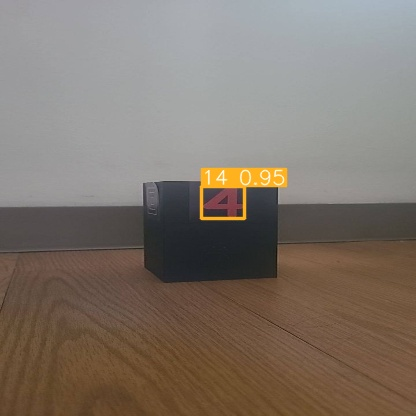

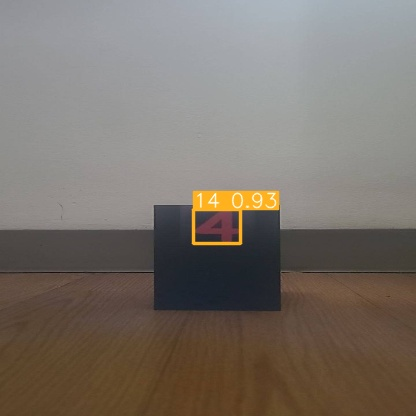

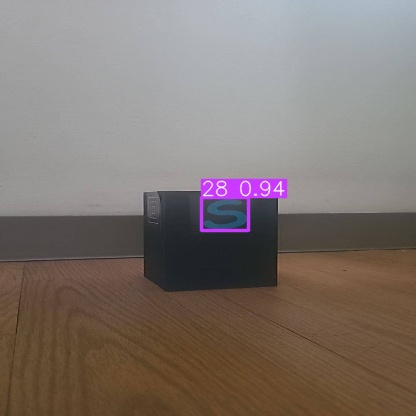

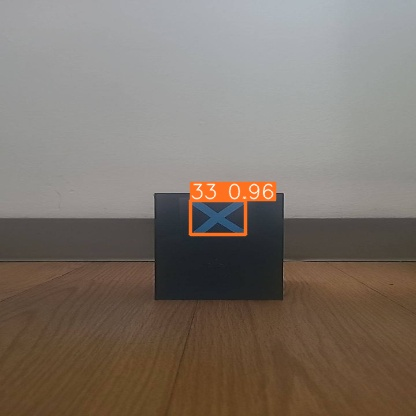

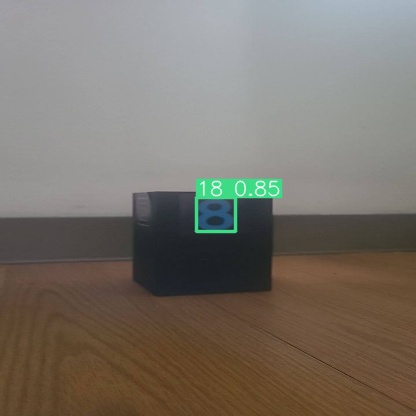

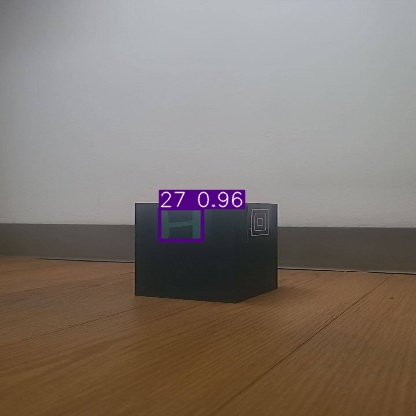

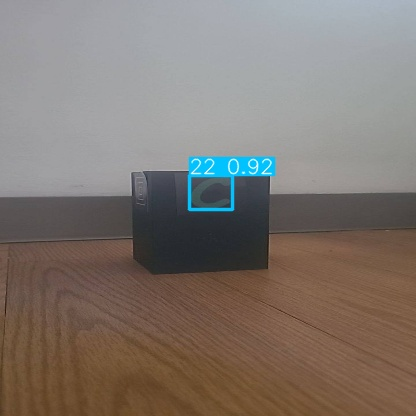

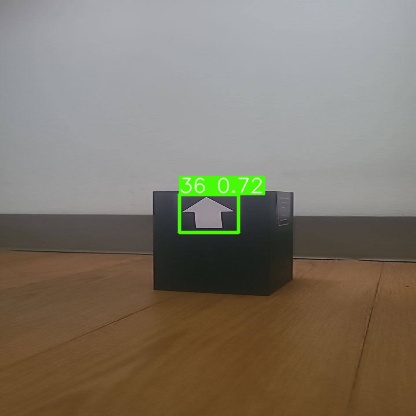

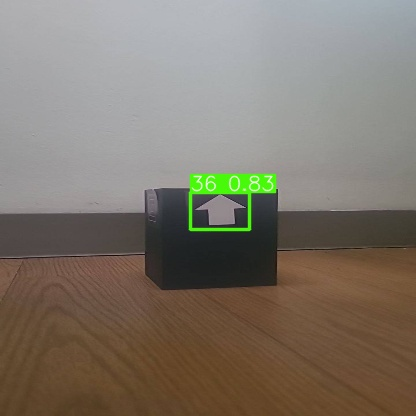

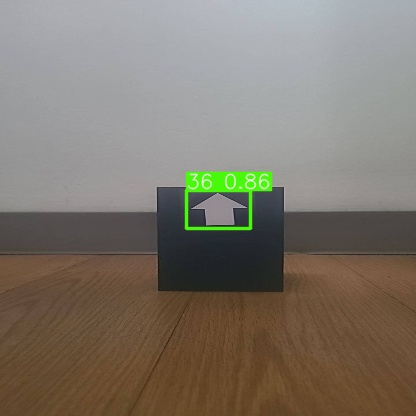

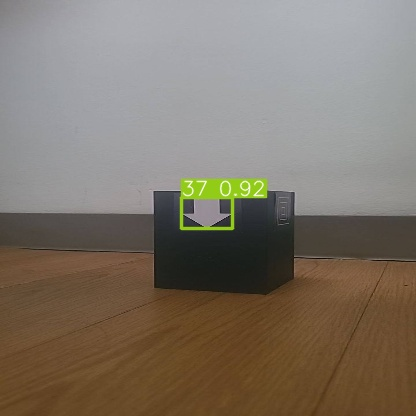

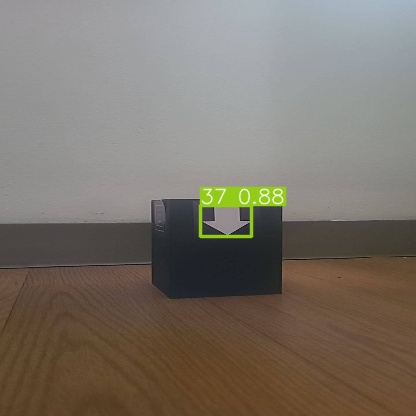

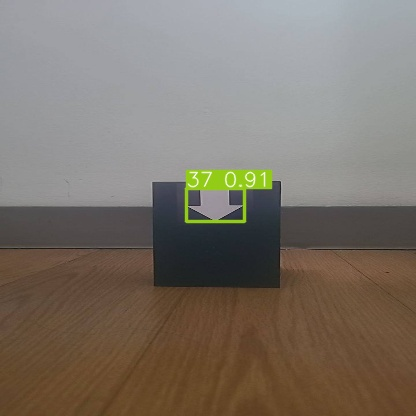

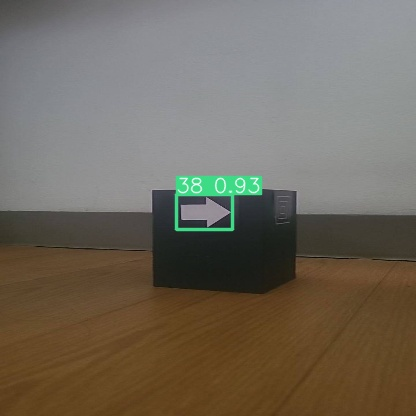

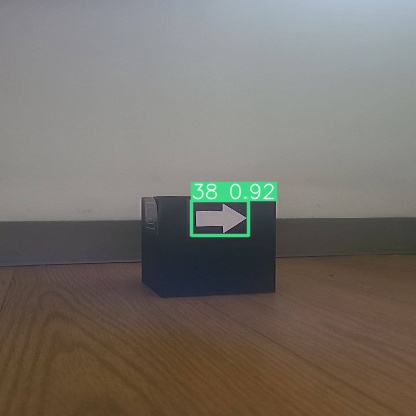

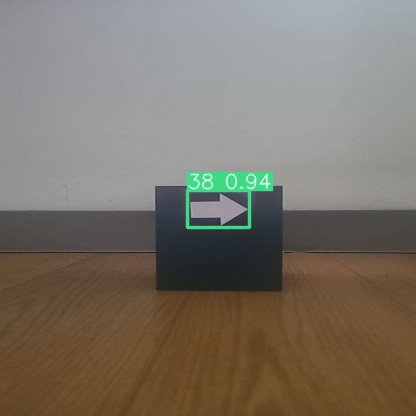

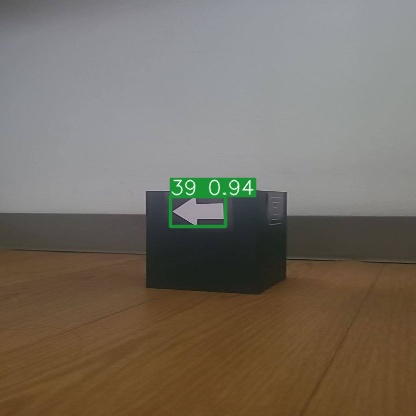

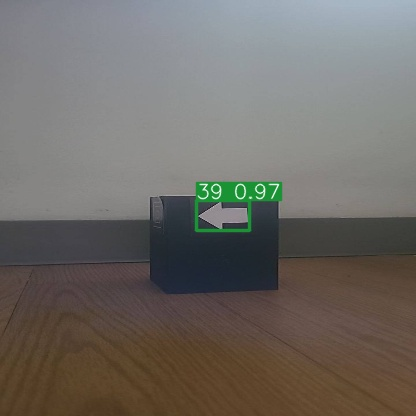

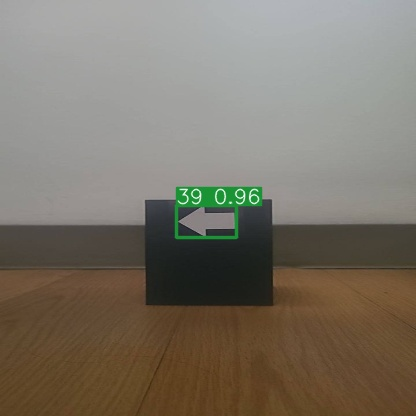

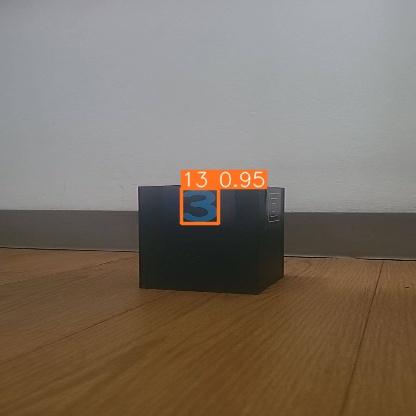

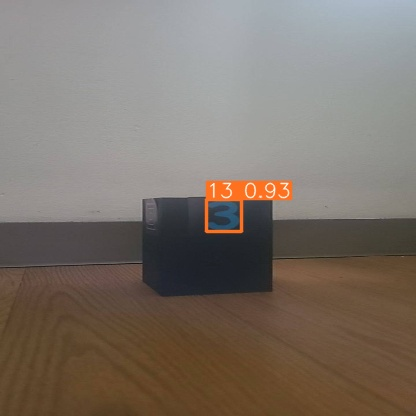

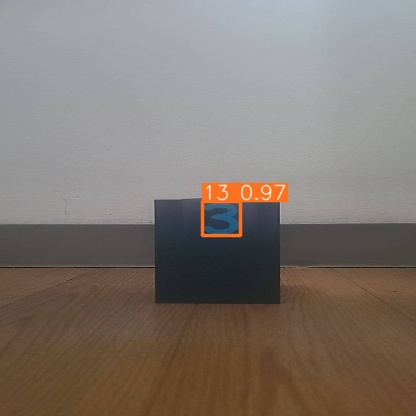

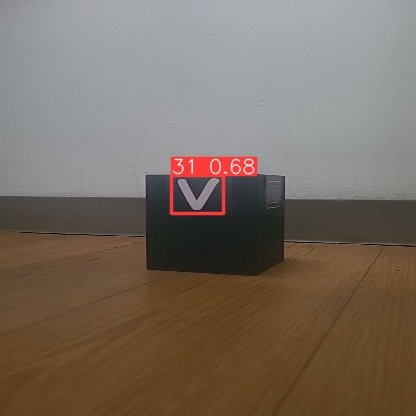

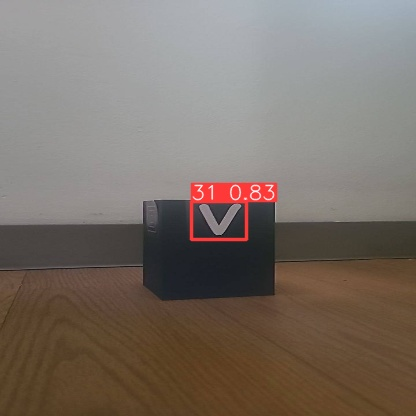

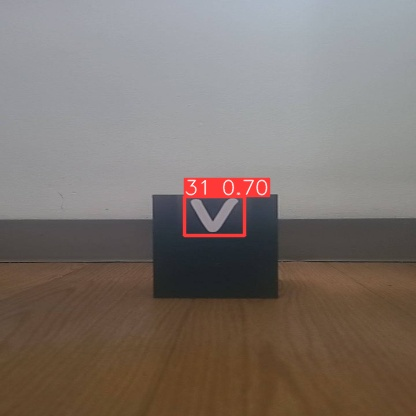

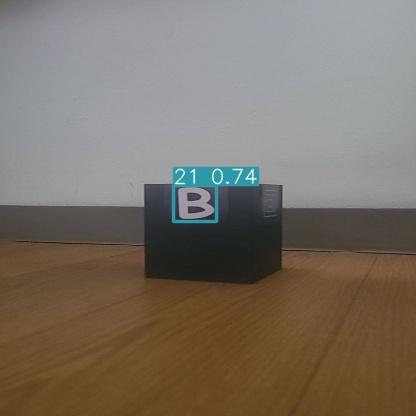

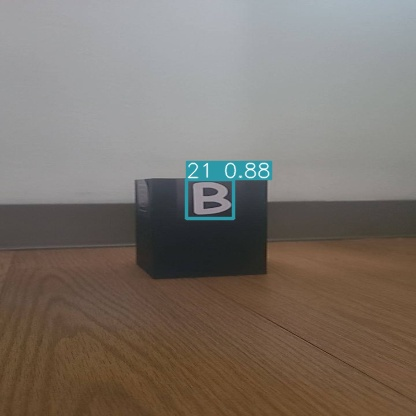

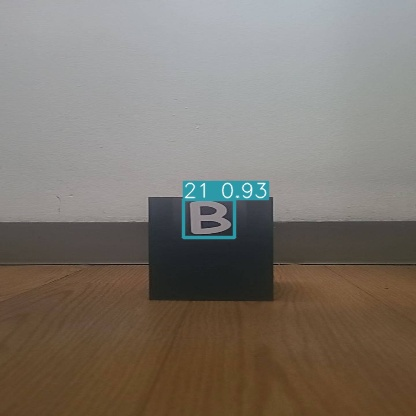

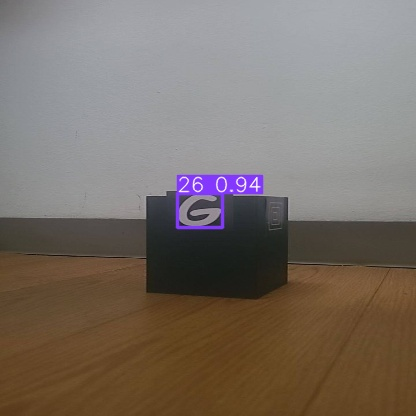

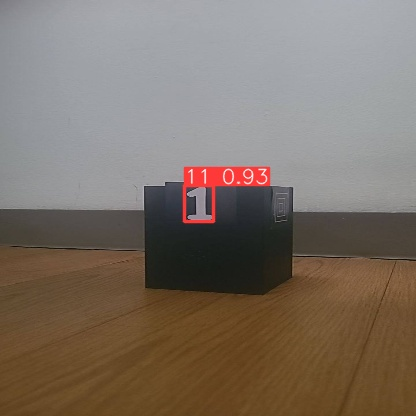

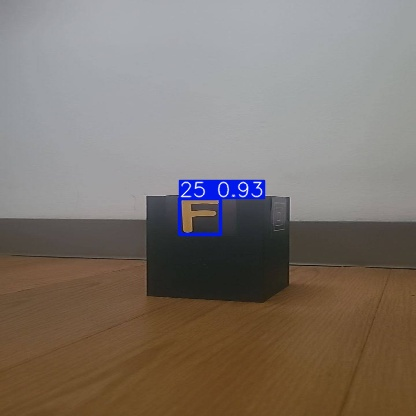

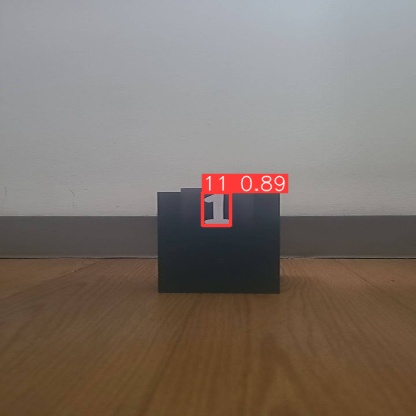

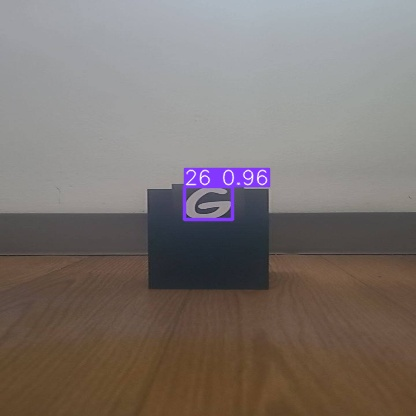

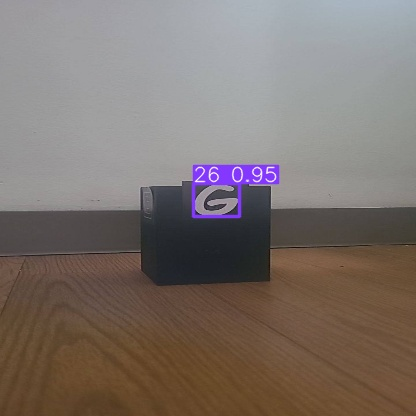

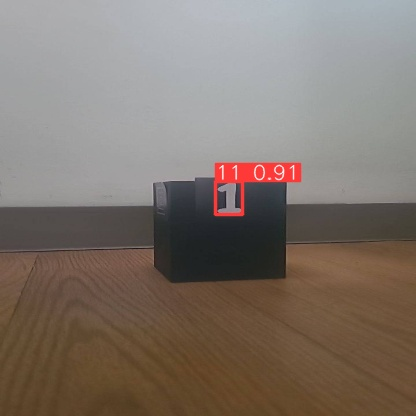

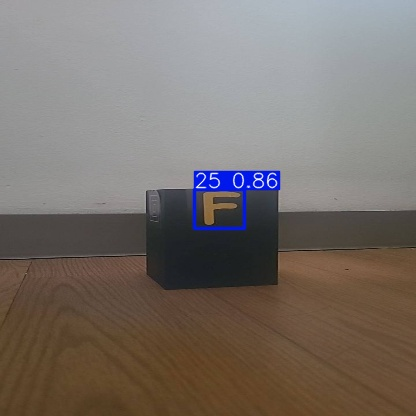

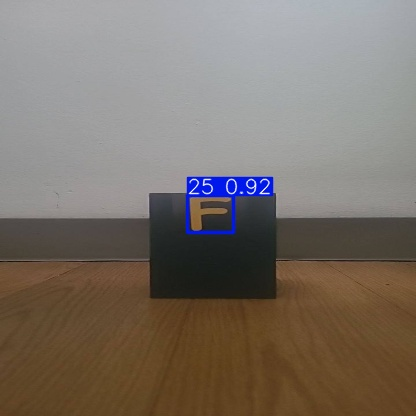

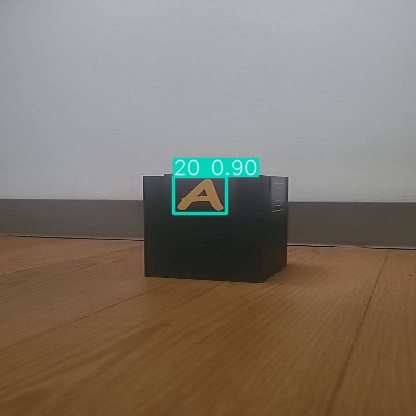

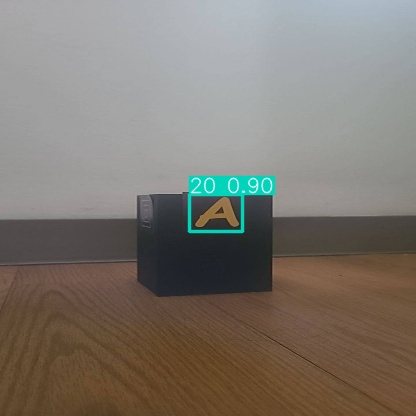

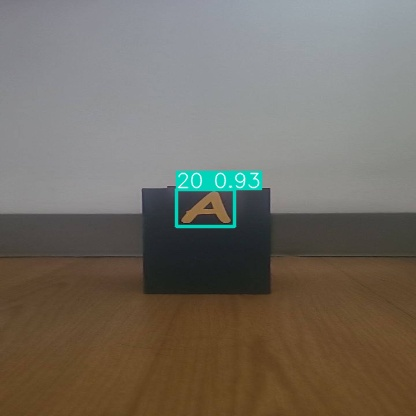

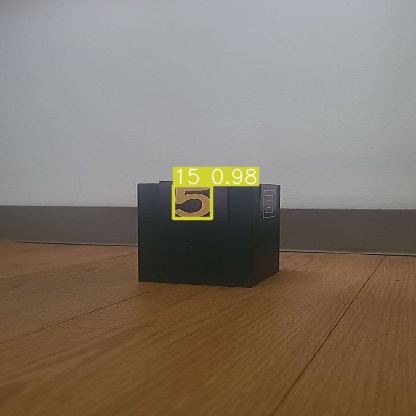

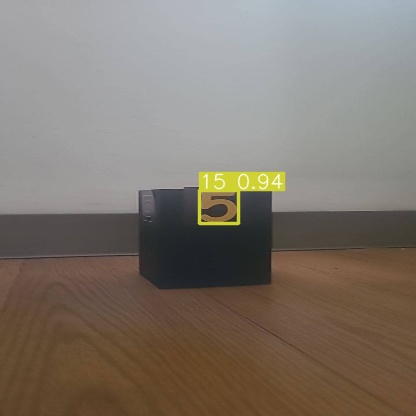

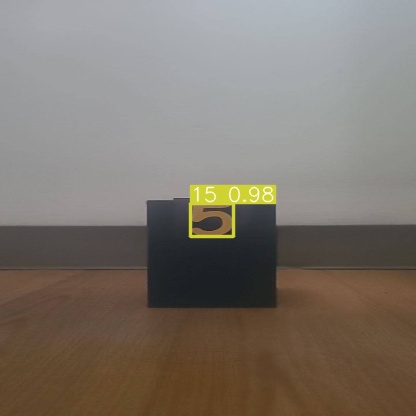

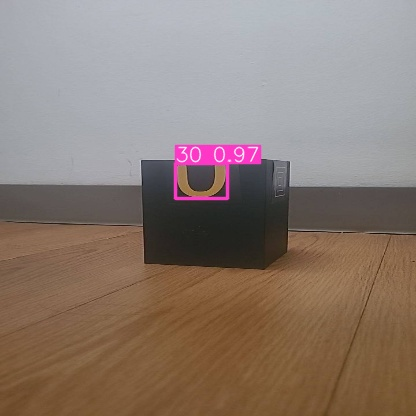

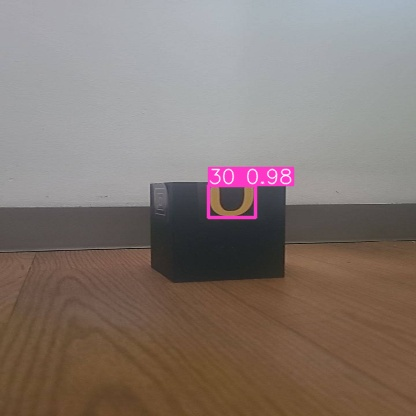

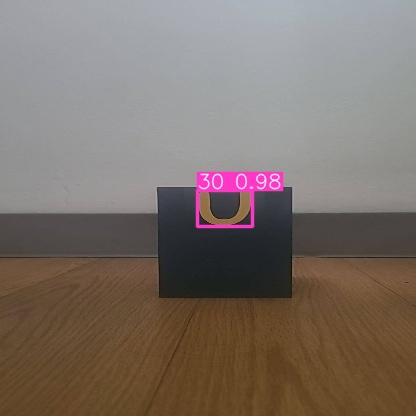

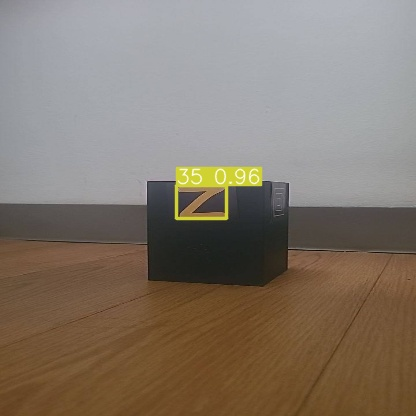

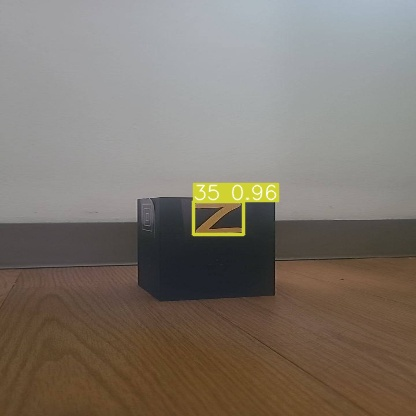

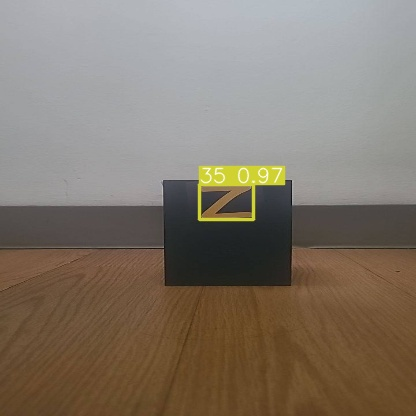

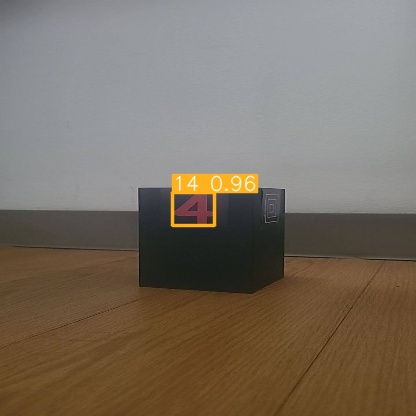

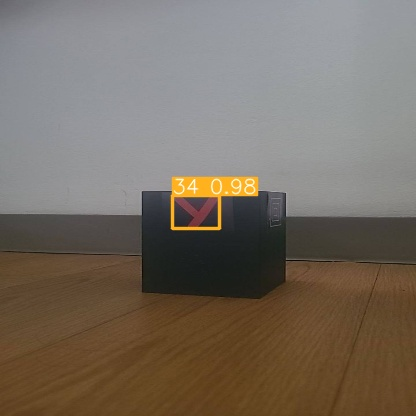

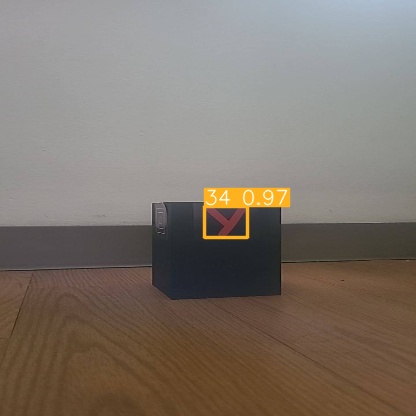

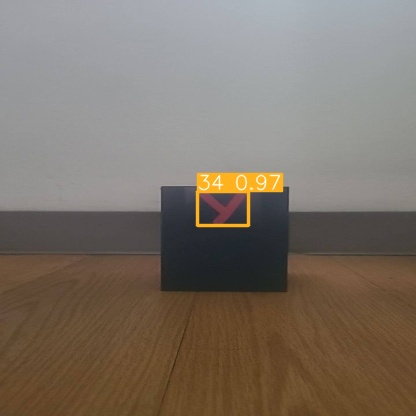

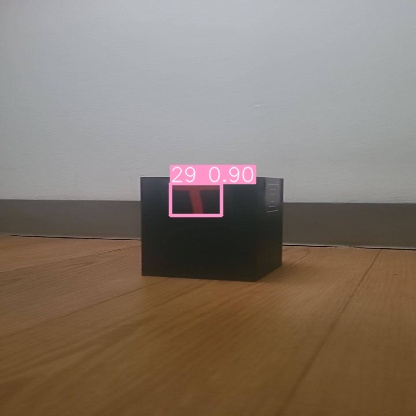

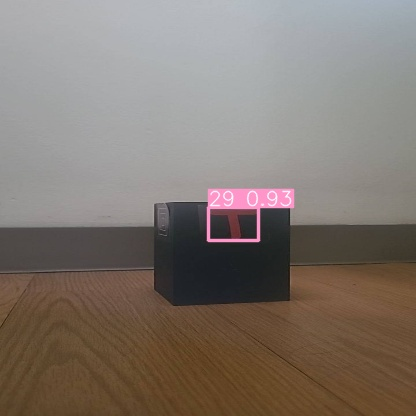

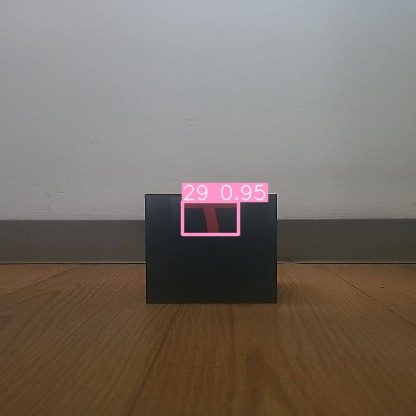

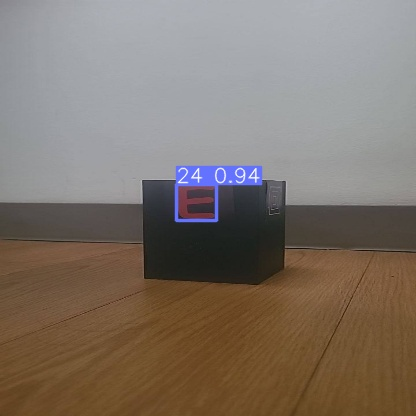

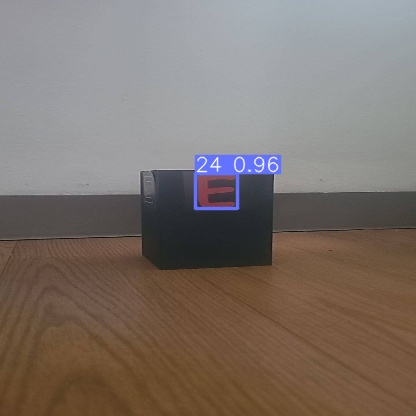

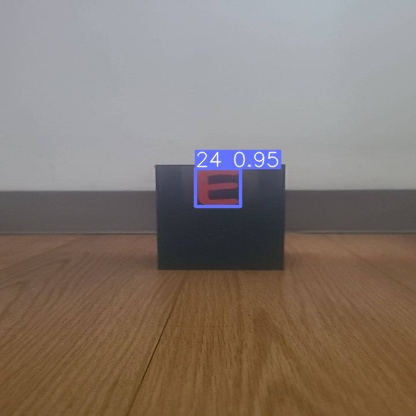

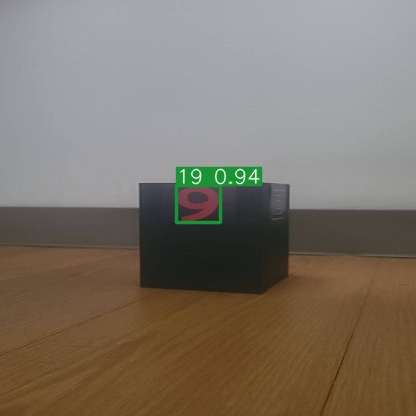

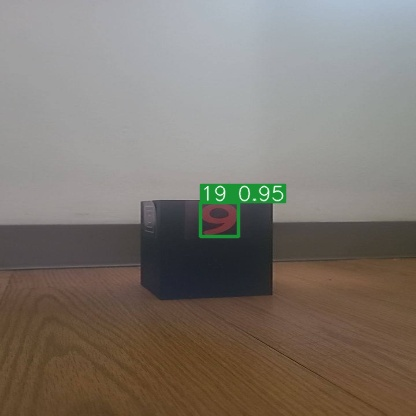

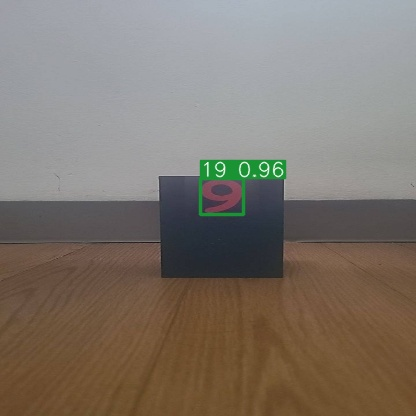

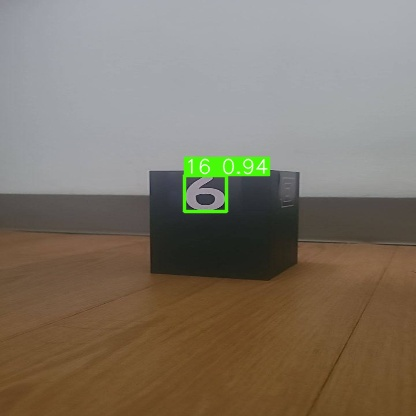

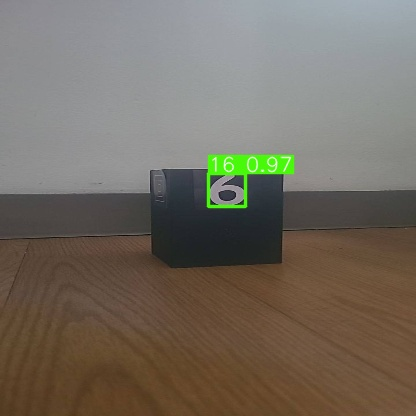

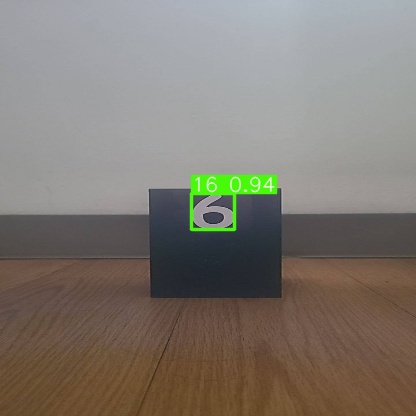

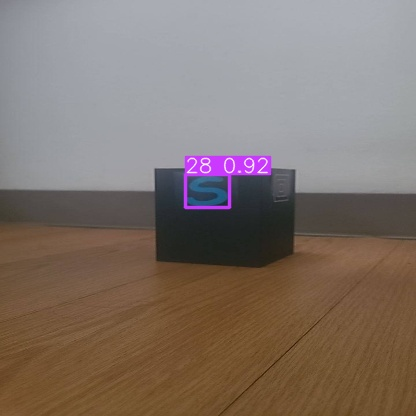

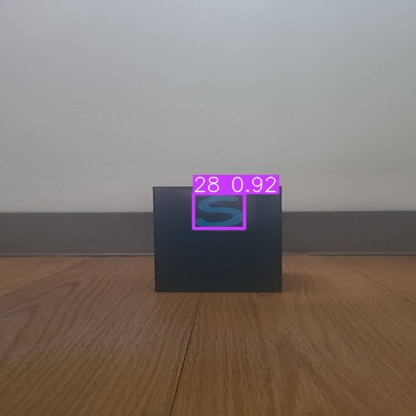

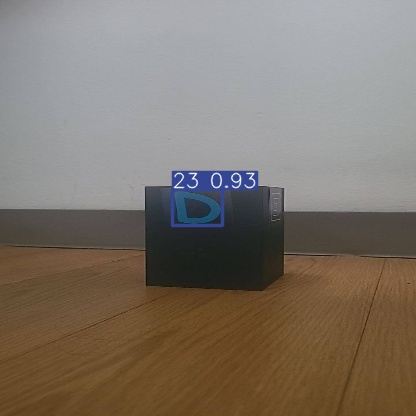

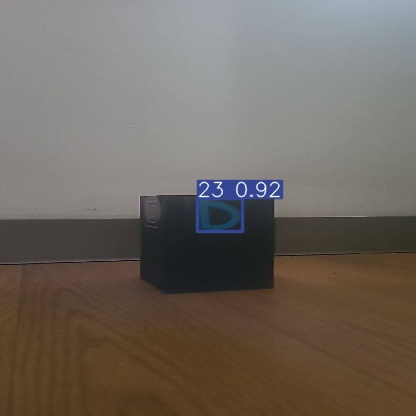

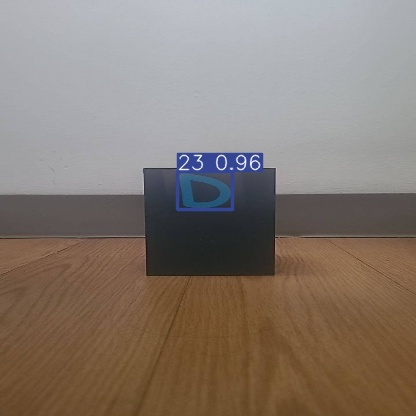

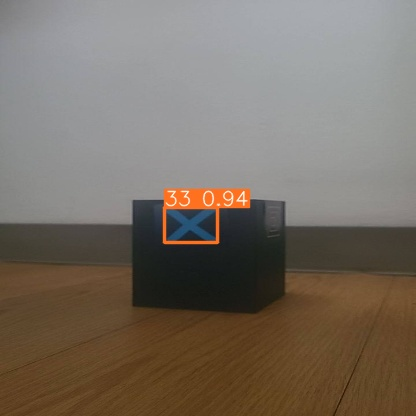

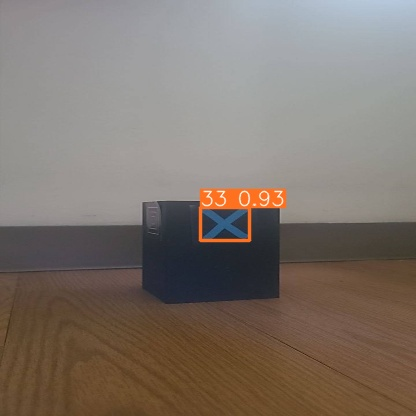

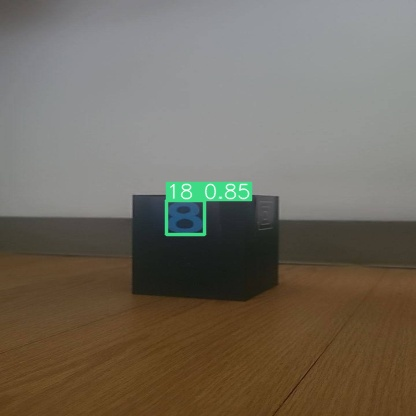

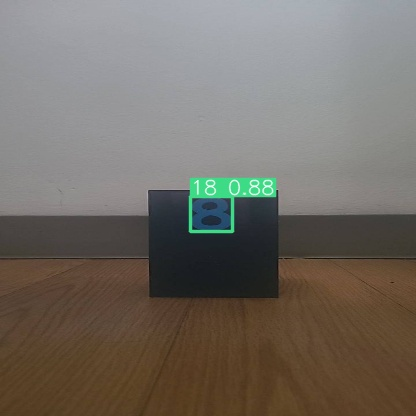

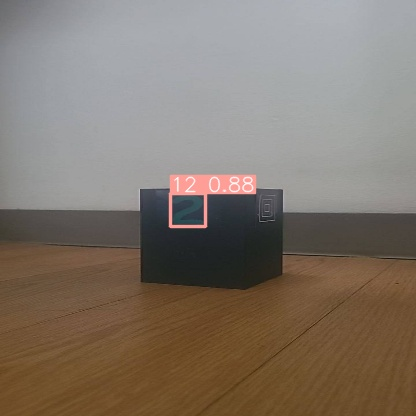

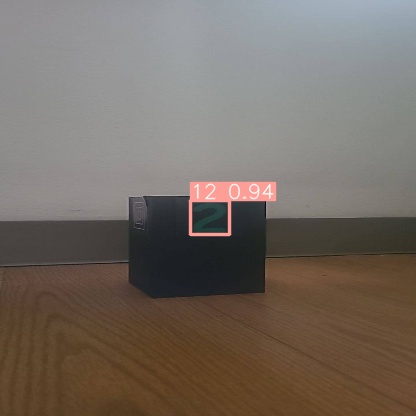

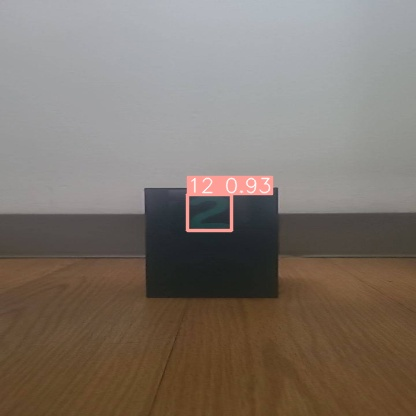

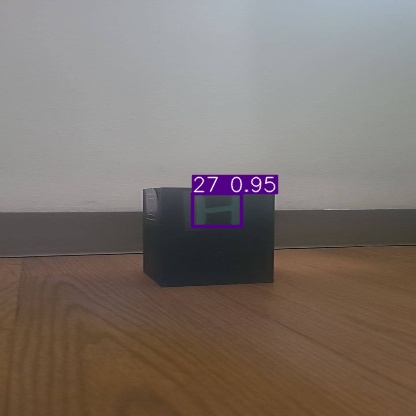

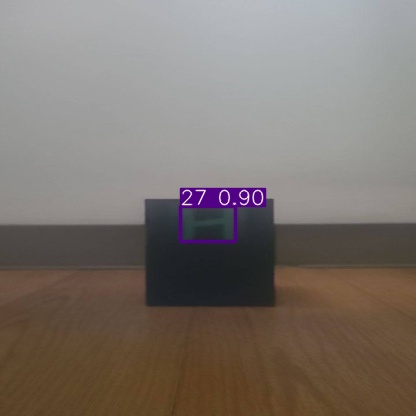

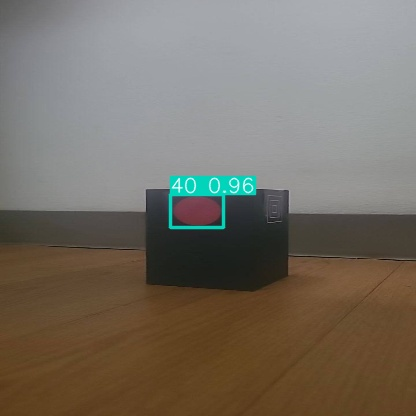

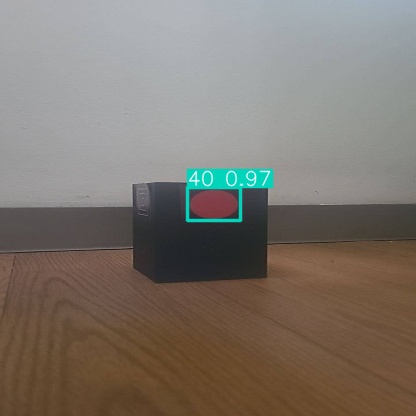

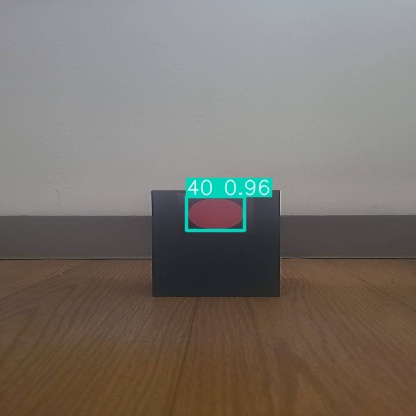

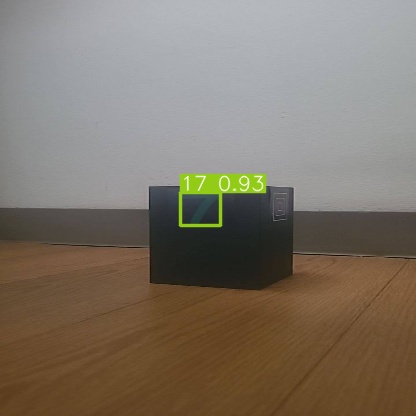

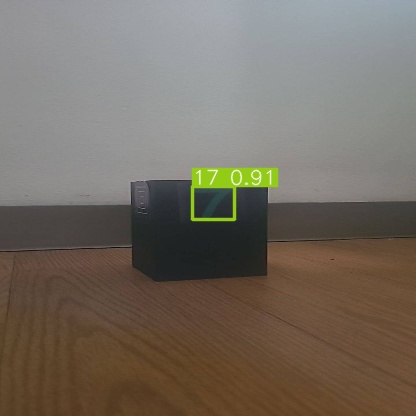

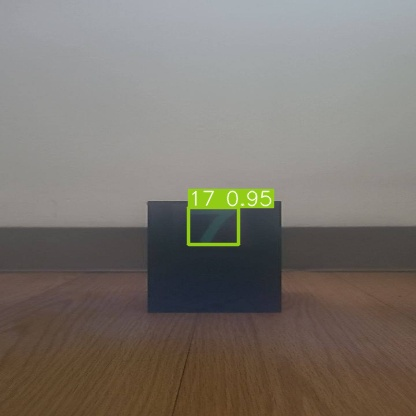

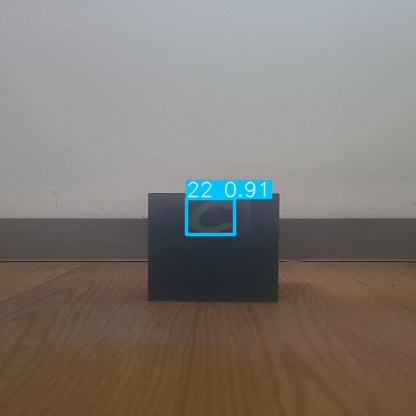

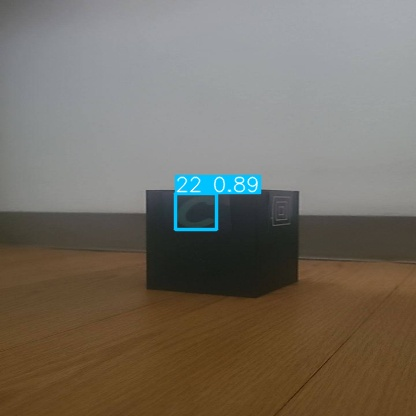

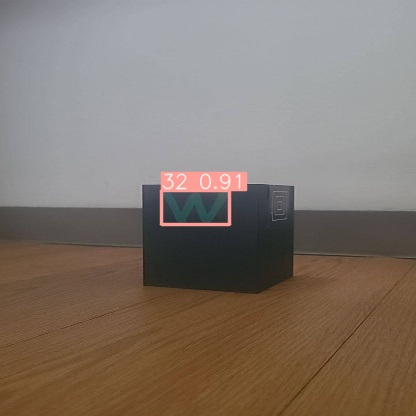

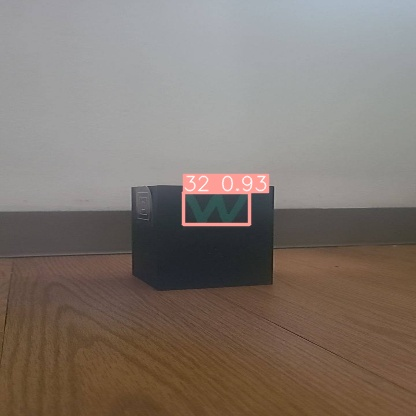

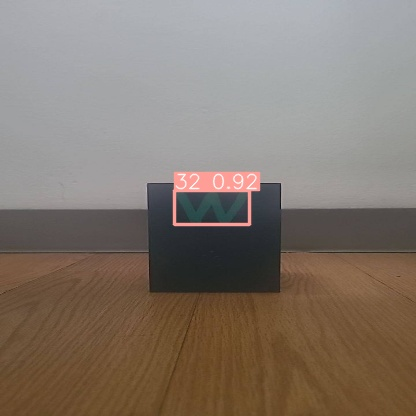

In [ ]:
predict_path = "runs/detect/predict2/"
image_files = os.listdir(predict_path)
# random.shuffle(image_files) # randomly pick images
# selected_images = image_files[:10]
for image in image_files:
  image_path = os.path.join(predict_path, image)
  display(Image(filename=image_path))
  print("\n")

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/cz3004-imageRec/MDPGrp34-Robo-3/runs/detect/train3/weights/best.pt source=general_test/newrawResizedImages save=True

Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 218 layers, 25859446 parameters, 0 gradients

image 1/2 /content/drive/MyDrive/cz3004-imageRec/general_test/newrawResizedImages/7b154f06-21ac-4290-a75b-be6f652091b8.jpg: 416x416 (no detections), 10.5ms
image 2/2 /content/drive/MyDrive/cz3004-imageRec/general_test/newrawResizedImages/bb87d8a5-892b-4e56-b9a1-0b5317f07c69.jpg: 416x416 1 18, 10.6ms
Speed: 2.3ms preprocess, 10.6ms inference, 48.3ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict6


## Test PiCamera images

In [ ]:
%cd /content/drive/MyDrive/cz3004-imageRec/

/content/drive/MyDrive/cz3004-imageRec


In [ ]:
preprocess("/content/drive/MyDrive/cz3004-imageRec/picamera_test")

invalid image path: /content/drive/MyDrive/cz3004-imageRec/picamera_test/.ipynb_checkpoints
invalid image path: /content/drive/MyDrive/cz3004-imageRec/picamera_test/runs
Conversion complete.


In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/cz3004-imageRec/MDPGrp34-Robo-3/runs/detect/train/weights/best.pt conf=0.5 source=picamera_test save=True

Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3012278 parameters, 0 gradients

image 1/1 /content/drive/MyDrive/cz3004-imageRec/picamera_test/original_A_bull.jpg: 416x416 1 20, 14.6ms
Speed: 1.2ms preprocess, 14.6ms inference, 234.5ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict2


In [ ]:
# remove old run files
!rm -r runs/detect/predict2

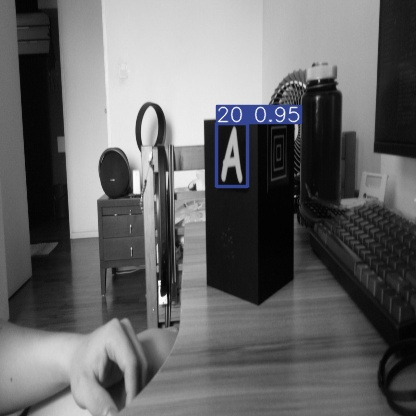

In [ ]:
image_files = [f for f in os.listdir("runs/detect/predict2") if f.endswith(".jpg")]

for image_file in image_files:
    image_path = os.path.join("runs/detect/predict2", image_file)
    display(Image(filename=image_path))

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1
Share your model with the world at: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred